In [1]:
### This file is for generating a synthetic NMR dataset from linear combinations of experimental data, using data processed with fft, phase, reference deconvolution, baseline_smooth.  



In [15]:
## Import dependencies

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import nmrglue as ng
from keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization
import csv
import seaborn as sns
import time
from sklearn.model_selection import train_test_split


## This code for making matplotlib plots display a specific size.
plt.rcParams["figure.figsize"] = (30,15)

In [16]:
## Define a function for RMSE between two arrays 

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Load dataset (lipid reference standard spectra and DMSO2-only spectra) and subtract DMSO2-only spectra from each lipid spectra.

In [17]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic3,data3 = ng.pipe.read('DL8_Trilinolein_3_PROTON-3-3.fid')
dic4,data4 = ng.pipe.read('DL8_Trilinolein_4_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic6,data6 = ng.pipe.read('DL_PE_10_PROTON_16scan-2.fid')
dic7,data7 = ng.pipe.read('DL7_DipalmitoylPE_PROTON-2-3.fid')
dic8,data8 = ng.pipe.read('DL7_DipalmitoylPE_2_rescan_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic10,data10 = ng.pipe.read('DL8_TriDHA_4_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic12,data12 = ng.pipe.read('DL_LipMix5_PC_10_PROTON-1-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic14,data14 = ng.pipe.read('DL8_EPAm_4_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic16,data16 = ng.pipe.read('DL8_Sphingomyelin_4_PROTON-2-3.fid')
dic17,data17 = ng.pipe.read('DL9_Sphingomyelin_PROTON-2-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic19,data19 = ng.pipe.read('DL7_Triolein_2_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic21,data21 = ng.pipe.read('DL7_LPC_PROTON-2-3.fid')
dic22,data22 = ng.pipe.read('DL7_LPC_2_PROTON-2-3.fid')
dic23,data23 = ng.pipe.read('DL7_Tripalmitin_2_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic25,data25 = ng.pipe.read('DL_LipMix6_CholArachidonate_PROTON-2-3.fid')
dic26,data26 = ng.pipe.read('DL7_CholArachidonate_2_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic29,data29 = ng.pipe.read('DL7_DimyristoylPE_2_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic31,data31 = ng.pipe.read('DL7_CholLinoleate_PROTON-2-3.fid')
dic32,data32 = ng.pipe.read('DL_Cholesterol_10_PROTON_16scan-2.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic34,data34 = ng.pipe.read('DL9_DioleoylPC_2_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')
dic36,data36 = ng.pipe.read('DL_PalmiticAcid_10_PROTON_16scan-3.fid')
dic37,data37 = ng.pipe.read('DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid')

## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data3 = data3 - data1
data4 = data4 - data1
data5 = data5 - data1
data6 = data6 - data1
data7 = data7 - data1
data8 = data8 - data1
data9 = data9 - data1
data10 = data10 - data1
data11 = data11 - data1
data12 = data12 - data1
data13 = data13 - data1
data14 = data14 - data1
data15 = data15 - data1
data16 = data16 - data1
data17 = data17 - data1
data18 = data18 - data1
data19 = data19 - data1
data20 = data20 - data1
data21 = data21 - data1
data22 = data22 - data1
data23 = data23 - data1
data24 = data24 - data1
data25 = data25 - data1
data26 = data26 - data1
data27 = data27 - data1
data28 = data28 - data1
data29 = data29 - data1
data30 = data30 - data1
data31 = data31 - data1
data32 = data32 - data1
data33 = data33 - data1
data34 = data34 - data1
data35 = data35 - data1
data36 = data36 - data1
data37 = data37 - data1



## Switch directories to get lipid profile information, read with pandas, make into numpy array, then (for no reason really) make a variable for each lipid profile.
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LipidProfiles = pd.read_excel('All_DL_Standards-LipidProfiles.xlsx', index_col=0)

LipidProf = np.array(LipidProfiles)

dataprof2 = LipidProf[0]
dataprof3 = LipidProf[1]
dataprof4 = LipidProf[2]
dataprof5 = LipidProf[3]
dataprof6 = LipidProf[4]
dataprof7 = LipidProf[5]
dataprof8 = LipidProf[6]
dataprof9 = LipidProf[7]
dataprof10 = LipidProf[8]
dataprof11 = LipidProf[9]
dataprof12 = LipidProf[10]
dataprof13 = LipidProf[11]
dataprof14 = LipidProf[12]
dataprof15 = LipidProf[13]
dataprof16 = LipidProf[14]
dataprof17 = LipidProf[15]
dataprof18 = LipidProf[16]
dataprof19 = LipidProf[17]
dataprof20 = LipidProf[18]
dataprof21 = LipidProf[19]
dataprof22 = LipidProf[20]
dataprof23 = LipidProf[21]
dataprof24 = LipidProf[22]
dataprof25 = LipidProf[23]
dataprof26 = LipidProf[24]
dataprof27 = LipidProf[25]
dataprof28 = LipidProf[26]
dataprof29 = LipidProf[27]
dataprof30 = LipidProf[28]
dataprof31 = LipidProf[29]
dataprof32 = LipidProf[30]
dataprof33 = LipidProf[31]
dataprof34 = LipidProf[32]
dataprof35 = LipidProf[33]
dataprof36 = LipidProf[34]
dataprof37 = LipidProf[35]


LipList5 = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC','LPC',"SM"]

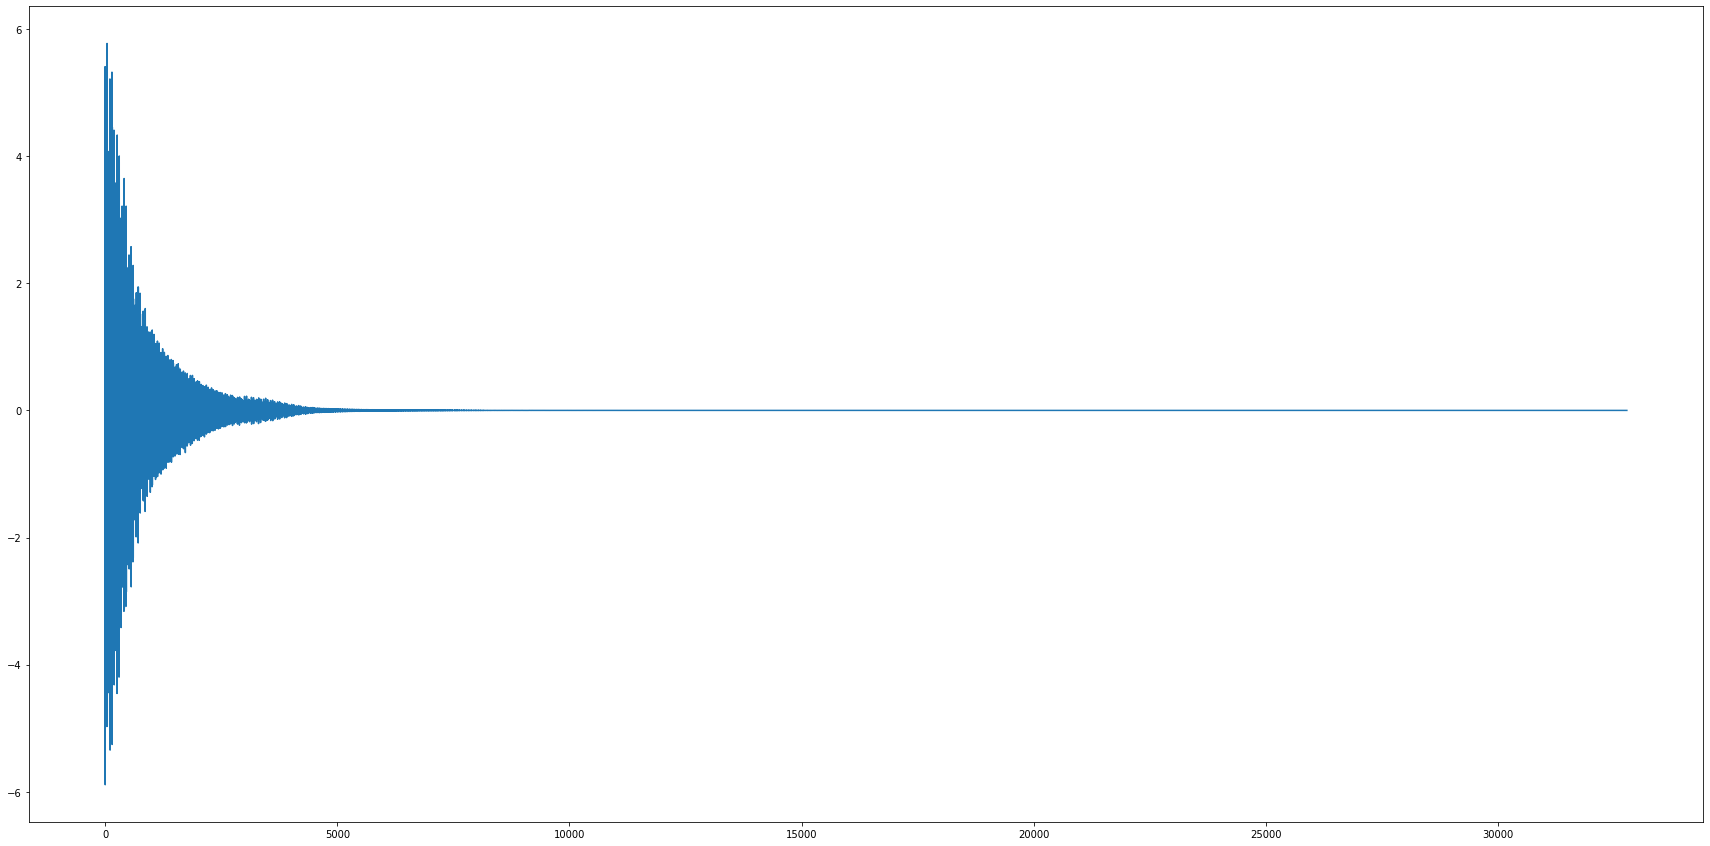

In [18]:
plt.plot(data1)

## Also load in 11 experimental lipid mixture spectra

In [282]:
## Switch directories, take only real data, reshape, and make an array of all mixture spectra. Also load lipid profile data for mixtures.
## A bunch of functions which should be changed to loops, or just one loop probably.

#
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")

#
Tdic1,Tdata1 = ng.pipe.read('DL_LipMix4_1_PROTON-2-3.fid')
Tdic2,Tdata2 = ng.pipe.read('DL_LipMix4_2_PROTON-2-3.fid')
Tdic3,Tdata3 = ng.pipe.read('DL_LipMix4_3_PROTON-3-3.fid')
Tdic4,Tdata4 = ng.pipe.read('DL_LipMix5_1_PROTON-3-3.fid')
Tdic5,Tdata5 = ng.pipe.read('DL_LipMix5_2_PROTON-3-3.fid')
Tdic6,Tdata6 = ng.pipe.read('DL_LipMix5_3_PROTON-3-3.fid')
Tdic9,Tdata9 = ng.pipe.read('DL_LipMix_7-3_PROTON-1-3.fid')
Tdic10,Tdata10 = ng.pipe.read('DL_LipMix_8-1_PROTON-2-3.fid')
Tdic12,Tdata12 = ng.pipe.read('DL_LipMixture_1_PROTON-2-3.fid')
Tdic13,Tdata13 = ng.pipe.read('DL_LipMixture_2_PROTON-2-3.fid')
Tdic14,Tdata14 = ng.pipe.read('DL_LipMixture_3_PROTON-2-3.fid')

#
#Tdic1,Tdata1 = ng.process.pipe_proc.em(Tdic1,Tdata1,lb=0.2)
#Tdic2,Tdata2 = ng.process.pipe_proc.em(Tdic2,Tdata2,lb=0.2)
#Tdic3,Tdata3 = ng.process.pipe_proc.em(Tdic3,Tdata3,lb=0.2)
#Tdic4,Tdata4 = ng.process.pipe_proc.em(Tdic4,Tdata4,lb=0.2)
#Tdic5,Tdata5 = ng.process.pipe_proc.em(Tdic5,Tdata5,lb=0.2)
#Tdic6,Tdata6 = ng.process.pipe_proc.em(Tdic6,Tdata6,lb=0.2)
#Tdic9,Tdata9 = ng.process.pipe_proc.em(Tdic9,Tdata9,lb=0.2)
#Tdic10,Tdata10 = ng.process.pipe_proc.em(Tdic10,Tdata10,lb=0.2)
#Tdic12,Tdata12 = ng.process.pipe_proc.em(Tdic12,Tdata12,lb=0.2)
#Tdic13,Tdata13 = ng.process.pipe_proc.em(Tdic13,Tdata13,lb=0.2)
#Tdic14,Tdata14 = ng.process.pipe_proc.em(Tdic14,Tdata14,lb=0.2)

#
Tdic1,Tdata1 = ng.process.pipe_proc.ft(Tdic1,Tdata1)
Tdic2,Tdata2 = ng.process.pipe_proc.ft(Tdic2,Tdata2)
Tdic3,Tdata3 = ng.process.pipe_proc.ft(Tdic3,Tdata3)
Tdic4,Tdata4 = ng.process.pipe_proc.ft(Tdic4,Tdata4)
Tdic5,Tdata5 = ng.process.pipe_proc.ft(Tdic5,Tdata5)
Tdic6,Tdata6 = ng.process.pipe_proc.ft(Tdic6,Tdata6)
Tdic9,Tdata9 = ng.process.pipe_proc.ft(Tdic9,Tdata9)
Tdic10,Tdata10 = ng.process.pipe_proc.ft(Tdic10,Tdata10)
Tdic12,Tdata12 = ng.process.pipe_proc.ft(Tdic12,Tdata12)
Tdic13,Tdata13 = ng.process.pipe_proc.ft(Tdic13,Tdata13)
Tdic14,Tdata14 = ng.process.pipe_proc.ft(Tdic14,Tdata14)

#
test1 = Tdata1.real
test2 = Tdata2.real
test3 = Tdata3.real
test4 = Tdata4.real
test5 = Tdata5.real
test6 = Tdata6.real
test9 = Tdata9.real
test10 = Tdata10.real
test12 = Tdata12.real
test13 = Tdata13.real
test14 = Tdata14.real

#
test = [test1,test2,test3,test4,test5,test6,test9,test10,test12,test13,test14]
test = np.array(test)
test = test[:,14000:28000]
#test = test/OvMax

##
os.chdir("/home/htjhnson/Downloads/DL_NMR")
TestLipProfiles = pd.read_excel('DL_LipMix_LipidProfiles_More.xlsx', index_col=0)

TestLipProfiles = np.array(TestLipProfiles)
## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
TestLipProfiles = np.array(TestLipProfiles)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)

In [20]:
## Set an amount of data points for the maximum individual metabolite shift

max_shift = 15

## Read in liver data, and some data of common interfering signals

In [67]:
## Load Liver Data

os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


testFiles = ['NGR_Liver_Lipids_1__proton-1-3.fid', 'NGR_Liver_Lipid_2_PROTON-1-3.fid', 'NGR_Liver_Lipids_3__proton-1-3.fid', 'NGR_Liver_Lipid_4_second__proton-1-3.fid','NGR_Liver_Lipid_5__PROTON-4-3.fid', 'NGR_Liver_Lipids_17__proton-1-3.fid','NGR_Liver_Lipids_18_PROTON-1-3.fid','NGR_Liver_Lipid_19_PROTON-1-3.fid','NGR_Liver_Lipid_21_second_half__proton-1-3.fid','NGR_Liver_Lipids_22_proton-1-3.fid','NGR_Liver_Lipids_23_PROTON-1-3.fid','NGR_Liver_Lipid_24_4th_half__proton-1-3.fid','NGR_Liver_25_Lipids___proton-1-3.fid','NGR_Liver_Lipids_36_PROTON-1-3.fid','NGR_Liver_Lipids_37_PROTON-2-3.fid','NGR_Liver_Lipids_39__proton-1-3.fid']
        
testFlist = []
for i in testFiles:
    testFlist.append(i[4:19])
    
testFlist = testFlist[:32]

LiverDic = []
LiverData = []
for i in range(len(testFlist)):
    globals()[testFlist[i]+ '_' + 'Dic'],globals()[testFlist[i]+ '_' + 'Data'] = ng.pipe.read(testFiles[i])
    LiverDic.append(globals()[testFlist[i]+ '_' + 'Dic'])
    LiverData.append(globals()[testFlist[i]+ '_' + 'Data'])
    
    
for i in np.arange(16):
    LiverDic[i],LiverData[i] = ng.process.pipe_proc.ft(LiverDic[i],LiverData[i])
    
#LiverData[i] = LiverData[i].real
    
for i in np.arange(16):
    LiverData[i] = np.reshape(LiverData[i], (32768,1))
    
#for i in np.arange(16):
#    LiverData[i] = LiverData[i]/OvMax
    
    
    
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LiverCRAFT1 = pd.read_excel('Liver_AdLib_AllData_half_reodered_adj.xlsx', index_col=0)
LipListCRAFT = ['Tg','TC','TFA','PUFA','MUFA','SFA','UFA','Om3','LA','PC','PE','SM','PUFAp','MUFAp','SFAp']

LiverData = np.array(LiverData)[:,14000:28000]
LiverData = LiverData

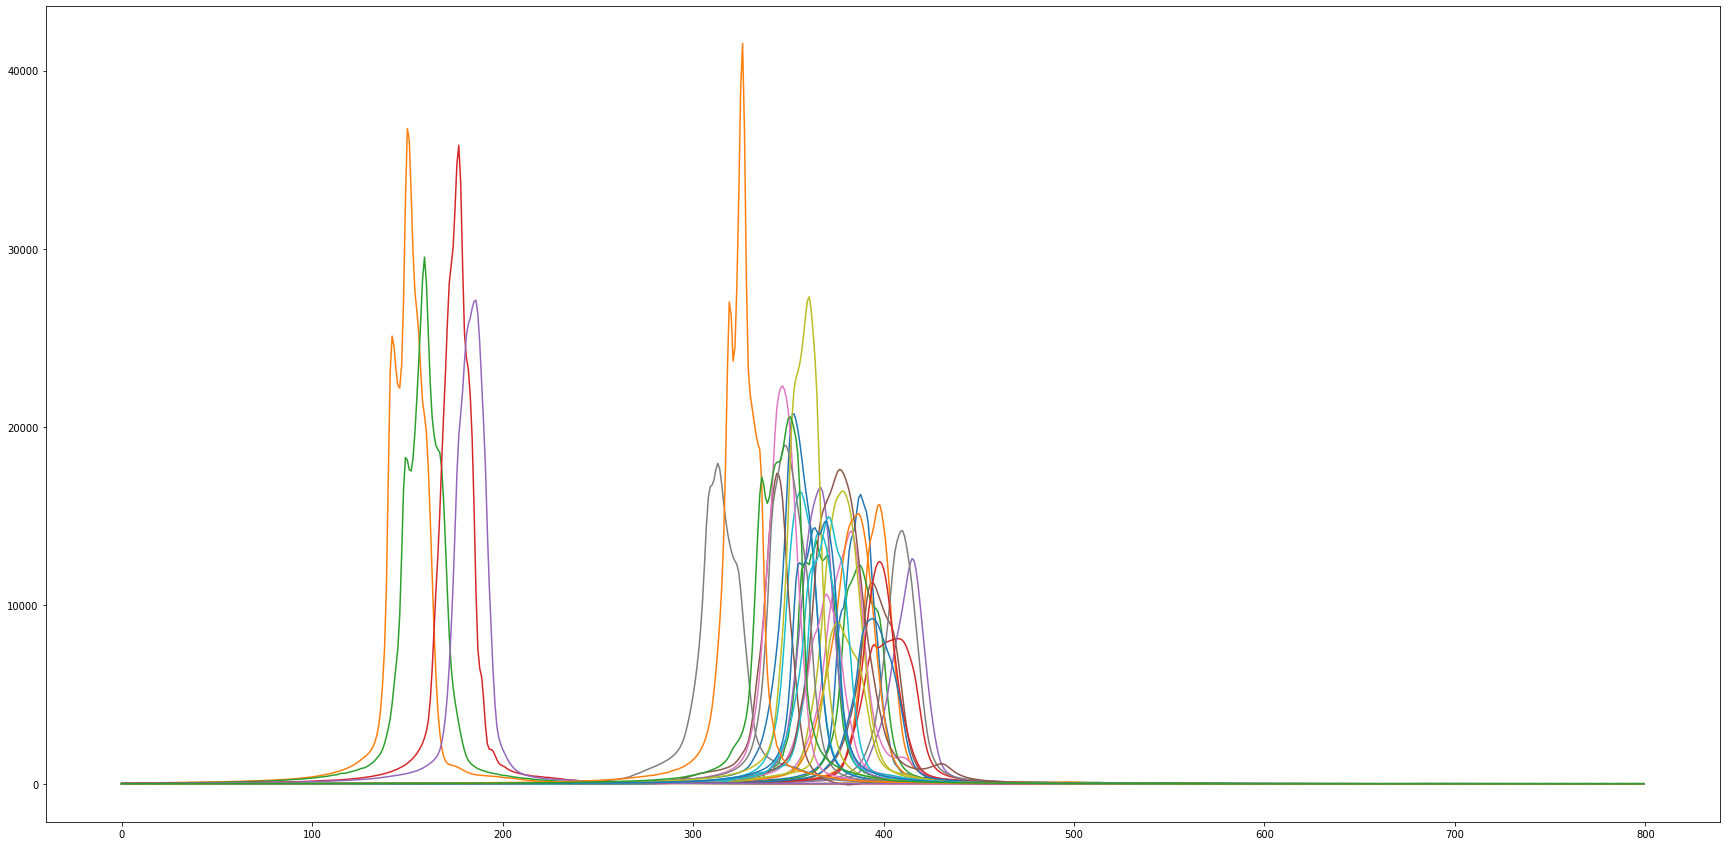

In [68]:
## Create  some variables for interference signals


## Variables for single peak water signals
# Initialize some list variables
w1f = []
for filename in os.listdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth"):
    if filename.startswith("D") == True:
        w1f.append(filename)       
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth")
# Initialize some list variables
w1 = []
w1d = []
# Read and append to list all FIDs and lipid profile values from data generation.
for i in np.arange(len(w1f)):
    wd,w = ng.pipe.read(w1f[i])
    w1d.append(wd)
    w1.append(w[14000:28000])
w1 = np.array(w1)
for i in np.arange(33):
    plt.plot(w1[i][2900:3700])

## Generate a dataset using linear combinations of lipid standards, then adding back DMSO2-only spectra. Add noise, baseline shift, shift individual metabolite signals, and vary linebroadening.

In [23]:
## None left out, all 34 reference scans, try different scalars (0.1-3)
## Use seeds for reproducibility


### None left out, all 34 reference scans, try different scalars (0.1-3)


spec = []
conc = []

#Generate data using one FID of each metabolite every time (less noise than all 36 probably?)

iterations = 55000

## Generate data using all 34 FIDs every time
for i in range(iterations):
    
    random.seed(i+10000)
    linebroad = random.choice([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

    #next three trilin.
    random.seed(i+1000)
    _dic2,_data2 = ng.process.pipe_proc.em(dic2,data2,lb=linebroad)
    _dic2,_data2 = ng.process.pipe_proc.ft(_dic2,_data2)
    _data2 = ng.process.proc_base.cs(_data2,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+0)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+1)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+1001)
    _dic3,_data3 = ng.process.pipe_proc.em(dic3,data3,lb=linebroad)
    _dic3,_data3 = ng.process.pipe_proc.ft(_dic3,_data3)
    _data3 = ng.process.proc_base.cs(_data3,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+3)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    
    random.seed(i+1002)
    _dic4,_data4 = ng.process.pipe_proc.em(dic4,data4,lb=linebroad)
    _dic4,_data4 = ng.process.pipe_proc.ft(_dic4,_data4)
    _data4 = ng.process.proc_base.cs(_data4,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+4)
    x4_int2 = 0
    random.seed(i+5)
    x4_int = random.randint(0,1)
    x4_data4  = x4_int*_data4*x4_int2
    y4_data4 = x4_int*dataprof4*x4_int2
    

    #Next 4 dipalmPE
    random.seed(i+1003)
    _dic5,_data5 = ng.process.pipe_proc.em(dic5,data5,lb=linebroad)
    _dic5,_data5 = ng.process.pipe_proc.ft(_dic5,_data5)
    _data5 = ng.process.proc_base.cs(_data5,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+6)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+7)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+1004)
    _dic6,_data6 = ng.process.pipe_proc.em(dic6,data6,lb=linebroad)
    _dic6,_data6 = ng.process.pipe_proc.ft(_dic6,_data6)
    _data6 = ng.process.proc_base.cs(_data6,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+8)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+9)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)

    random.seed(i+1005)
    _dic7,_data7 = ng.process.pipe_proc.em(dic7,data7,lb=linebroad)
    _dic7,_data7 = ng.process.pipe_proc.ft(_dic7,_data7)
    _data7 = ng.process.proc_base.cs(_data7,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+10)
    x7_int2 = 0
    random.seed(i+11)
    x7_int = random.randint(0,1)
    x7_data7  = x7_int*_data7*x7_int2
    y7_data7 = x7_int*dataprof7*x7_int2
    
    random.seed(i+1006)
    _dic8,_data8 = ng.process.pipe_proc.em(dic8,data8,lb=linebroad)
    _dic8,_data8 = ng.process.pipe_proc.ft(_dic8,_data8)
    _data8 = ng.process.proc_base.cs(_data8,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+12)
    x8_int2 = 0
    random.seed(i+13)
    x8_int = random.randint(0,1)
    x8_data8  = x8_int*_data8*x8_int2
    y8_data8 = x8_int*dataprof8*x8_int2

    #Next two triDHA
    random.seed(i+1007)
    _dic9,_data9 = ng.process.pipe_proc.em(dic9,data9,lb=linebroad)
    _dic9,_data9 = ng.process.pipe_proc.ft(_dic9,_data9)
    _data9 = ng.process.proc_base.cs(_data9,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+14)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+15)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+1008)
    _dic10,_data10 = ng.process.pipe_proc.em(dic10,data10,lb=linebroad)
    _dic10,_data10 = ng.process.pipe_proc.ft(_dic10,_data10)
    _data10 = ng.process.proc_base.cs(_data10,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+16)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+17)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+1009)
    _dic11,_data11 = ng.process.pipe_proc.em(dic11,data11,lb=linebroad)
    _dic11,_data11 = ng.process.pipe_proc.ft(_dic11,_data11)
    _data11 = ng.process.proc_base.cs(_data11,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+18)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+19)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010)
    _dic12,_data12 = ng.process.pipe_proc.em(dic12,data12,lb=linebroad)
    _dic12,_data12 = ng.process.pipe_proc.ft(_dic12,_data12)
    _data12 = ng.process.proc_base.cs(_data12,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+20)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011)
    _dic13,_data13 = ng.process.pipe_proc.em(dic13,data13,lb=linebroad)
    _dic13,_data13 = ng.process.pipe_proc.ft(_dic13,_data13)
    _data13 = ng.process.proc_base.cs(_data13,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+22)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+23)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1012)
    _dic14,_data14 = ng.process.pipe_proc.em(dic14,data14,lb=linebroad)
    _dic14,_data14 = ng.process.pipe_proc.ft(_dic14,_data14)
    _data14 = ng.process.proc_base.cs(_data14,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+24)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 3 sphingomyelin
    random.seed(i+1013)
    _dic15,_data15 = ng.process.pipe_proc.em(dic15,data15,lb=linebroad)
    _dic15,_data15 = ng.process.pipe_proc.ft(_dic15,_data15)
    _data15 = ng.process.proc_base.cs(_data15,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+26)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014)
    _dic16,_data16 = ng.process.pipe_proc.em(dic16,data16,lb=linebroad)
    _dic16,_data16 = ng.process.pipe_proc.ft(_dic16,_data16)
    _data16 = ng.process.proc_base.cs(_data16,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+28)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    random.seed(i+1015)
    _dic17,_data17 = ng.process.pipe_proc.em(dic17,data17,lb=linebroad)
    _dic17,_data17 = ng.process.pipe_proc.ft(_dic17,_data17)
    _data17 = ng.process.proc_base.cs(_data17,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+30)
    x17_int2 = 0
    random.seed(i+31)
    x17_int = random.randint(0,1)
    x17_data17  = x17_int*_data17*x17_int2
    y17_data17 = x17_int*dataprof17*x17_int2
    
    #Next two triolein
    random.seed(i+1016)
    _dic18,_data18 = ng.process.pipe_proc.em(dic18,data18,lb=linebroad)
    _dic18,_data18 = ng.process.pipe_proc.ft(_dic18,_data18)
    _data18 = ng.process.proc_base.cs(_data18,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+32)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017)
    _dic19,_data19 = ng.process.pipe_proc.em(dic19,data19,lb=linebroad)
    _dic19,_data19 = ng.process.pipe_proc.ft(_dic19,_data19)
    _data19 = ng.process.proc_base.cs(_data19,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+34)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next three all LPC
    random.seed(i+1018)
    _dic20,_data20 = ng.process.pipe_proc.em(dic20,data20,lb=linebroad)
    _dic20,_data20 = ng.process.pipe_proc.ft(_dic20,_data20)
    _data20 = ng.process.proc_base.cs(_data20,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+36)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019)
    _dic21,_data21 = ng.process.pipe_proc.em(dic21,data21,lb=linebroad)
    _dic21,_data21 = ng.process.pipe_proc.ft(_dic21,_data21)
    _data21 = ng.process.proc_base.cs(_data21,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+38)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2
    
    random.seed(i+1020)
    _dic22,_data22 = ng.process.pipe_proc.em(dic22,data22,lb=linebroad)
    _dic22,_data22 = ng.process.pipe_proc.ft(_dic22,_data22)
    _data22 = ng.process.proc_base.cs(_data22,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+40)
    x22_int2 = 0
    random.seed(i+41)
    x22_int = random.randint(0,1)
    x22_data22  = x22_int*_data22*x22_int2
    y22_data22 = x22_int*dataprof22*x22_int2
    
    #Next two Tripalm
    random.seed(i+1021)
    _dic23,_data23 = ng.process.pipe_proc.em(dic23,data23,lb=linebroad)
    _dic23,_data23 = ng.process.pipe_proc.ft(_dic23,_data23)
    _data23 = ng.process.proc_base.cs(_data23,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+42)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022)
    _dic24,_data24 = ng.process.pipe_proc.em(dic24,data24,lb=linebroad)
    _dic24,_data24 = ng.process.pipe_proc.ft(_dic24,_data24)
    _data24 = ng.process.proc_base.cs(_data24,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+44)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next three cholesteryl arachidonate
    random.seed(i+1023)
    _dic25,_data25 = ng.process.pipe_proc.em(dic25,data25,lb=linebroad)
    _dic25,_data25 = ng.process.pipe_proc.ft(_dic25,_data25)
    _data25 = ng.process.proc_base.cs(_data25,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+46)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024)
    _dic26,_data26 = ng.process.pipe_proc.em(dic26,data26,lb=linebroad)
    _dic26,_data26 = ng.process.pipe_proc.ft(_dic26,_data26)
    _data26 = ng.process.proc_base.cs(_data26,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+48)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    random.seed(i+1025)
    _dic27,_data27 = ng.process.pipe_proc.em(dic27,data27,lb=linebroad)
    _dic27,_data27 = ng.process.pipe_proc.ft(_dic27,_data27)
    _data27 = ng.process.proc_base.cs(_data27,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+50)
    x27_int2 = 0
    random.seed(i+51)
    x27_int = random.randint(0,1)
    x27_data27  = x27_int*_data27*x27_int2
    y27_data27 = x27_int*dataprof27*x27_int2
    
    #Next two dimyristPE
    random.seed(i+1026)
    _dic28,_data28 = ng.process.pipe_proc.em(dic28,data28,lb=linebroad)
    _dic28,_data28 = ng.process.pipe_proc.ft(_dic28,_data28)
    _data28 = ng.process.proc_base.cs(_data28,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+52)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027)
    _dic29,_data29 = ng.process.pipe_proc.em(dic29,data29,lb=linebroad)
    _dic29,_data29 = ng.process.pipe_proc.ft(_dic29,_data29)
    _data29 = ng.process.proc_base.cs(_data29,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+54)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028)
    _dic30,_data30 = ng.process.pipe_proc.em(dic30,data30,lb=linebroad)
    _dic30,_data30 = ng.process.pipe_proc.ft(_dic30,_data30)
    _data30 = ng.process.proc_base.cs(_data30,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+56)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029)
    _dic31,_data31 = ng.process.pipe_proc.em(dic31,data31,lb=linebroad)
    _dic31,_data31 = ng.process.pipe_proc.ft(_dic31,_data31)
    _data31 = ng.process.proc_base.cs(_data31,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+58)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030)
    _dic32,_data32 = ng.process.pipe_proc.em(dic32,data32,lb=linebroad)
    _dic32,_data32 = ng.process.pipe_proc.ft(_dic32,_data32)
    _data32 = ng.process.proc_base.cs(_data32,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+60)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031)
    _dic33,_data33 = ng.process.pipe_proc.em(dic33,data33,lb=linebroad)
    _dic33,_data33 = ng.process.pipe_proc.ft(_dic33,_data33)
    _data33 = ng.process.proc_base.cs(_data33,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+62)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032)
    _dic34,_data34 = ng.process.pipe_proc.em(dic34,data34,lb=linebroad)
    _dic34,_data34 = ng.process.pipe_proc.ft(_dic34,_data34)
    _data34 = ng.process.proc_base.cs(_data34,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+64)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033)
    _dic35,_data35 = ng.process.pipe_proc.em(dic35,data35,lb=linebroad)
    _dic35,_data35 = ng.process.pipe_proc.ft(_dic35,_data35)
    _data35 = ng.process.proc_base.cs(_data35,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+66)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034)
    _dic36,_data36 = ng.process.pipe_proc.em(dic36,data36,lb=linebroad)
    _dic36,_data36 = ng.process.pipe_proc.ft(_dic36,_data36)
    _data36 = ng.process.proc_base.cs(_data36,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+68)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035)
    _dic37,_data37 = ng.process.pipe_proc.em(dic37,data37,lb=linebroad)
    _dic37,_data37 = ng.process.pipe_proc.ft(_dic37,_data37)
    _data37 = ng.process.proc_base.cs(_data37,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+70)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    ## Now process the DMSO2 reference as well
    _dic1,_data1 = ng.process.pipe_proc.em(dic1,data1,lb=linebroad)
    _dic1, _data1 = ng.process.pipe_proc.ft(_dic1,_data1)

 
    xdata = _data1+x2_data2+x3_data3+x4_data4+x5_data5+x6_data6+x7_data7+x8_data8+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x17_data17+x18_data18+x19_data19+x20_data20+x21_data21+x22_data22+x23_data23+x24_data24+x25_data25+x26_data26+x27_data27+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y4_data4+y5_data5+y6_data6+y7_data7+y8_data8+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y17_data17+y18_data18+y19_data19+y20_data20+y21_data21+y22_data22+y23_data23+y24_data24+y25_data25+y26_data26+y27_data27+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37


        
    
    ## Take only important lipid signal region for each spectra, then add random levels of noise.
    xdata = xdata[14000:28000]
    np.random.seed(i+670)
    random.seed(i+670)
    r = random.uniform(0.1,3)
    xdata = xdata+np.random.uniform(low=-10*r,high=10*r,size=14000)

    
    
    

    ## Now define and add interference signals
    
    ## Now define and add interference signals
    
    # TMS
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+90800)
    r1 = random.choice(np.arange(11))
    random.seed(i+2098765)
    scale1 = random.uniform(0.01,2)
    TMS = LiverData[r1].copy()*scale1
    TMS[:13350] = np.zeros([13350,1])
    TMS[13525:] = np.zeros([475,1])
    TMS = np.reshape(TMS,[14000])
    TMS[13350:13525] = TMS[13350:13525] - (TMS[13350:13525].min() - xdata[:1000].mean())
    # Randomly do or do not add TMS signal
    random.seed(i+3543)
    TMS = random.choice([np.zeros(14000),TMS])
    xdata = xdata + TMS

    
    # Water
    # Pick either presat signal (i.e. don't add any signal) or signal with one or two water peaks (from either lipid standards or hepatic spectra, respectively)
    # Define a scalar for the water region
    random.seed(i+3098765)
    scale2 = random.uniform(0.01,2)
    # First pick one of the double peak signals from a hepatic spectra
    random.seed(i+4101025)
    r2 = random.choice(np.arange(16))
    Water = LiverData[r2].copy()
    Water[:2900] = np.zeros([2900,1])
    Water[3700:] = np.zeros([10300,1])
    Water = np.reshape(Water,[14000])*scale2
    # Second pick one of the single peak water signals
    random.seed(i+8372)
    r3 = random.choice(np.arange(33))
    Water2 = w1[r3]*scale2
    Water2[:2900] = np.zeros([2900])
    Water2[3700:] = np.zeros([10300])
    # Now pick only one of the three above scenarios to be the water region in the synthetic spectra
    random.seed(i+43526)
    #xdata[2900:3700] = random.choice([Water[2900:3700]+np.random.uniform(low=-10*r,high=10*r,size=800),Water2[2900:3700]+np.random.uniform(low=-10*r,high=10*r,size=800)])
    w = random.choice([Water,Water2,np.zeros(14000)])
    xdata = xdata + w
    
    
    # MTBE
    # Isolate MTBE signal from one hepatic spectra
    random.seed(i+572803)
    r4 = random.choice(np.arange(16))
    random.seed(i+30988765)
    scale3 = random.uniform(0.01,2)
    MTBE = LiverData[r4].copy()*scale3
    MTBE[:6355] = np.zeros([6355,1])
    MTBE[6385:10775] = np.zeros([10775-6385,1])
    MTBE[10800:] = np.zeros([3200,1])
    MTBE = np.reshape(MTBE,[14000])
    MTBE[6355:6385] = MTBE[6355:6385] - (MTBE[6355:6385].min() - xdata[:1000].mean())
    MTBE[10775:10800] = MTBE[10775:10800] - (MTBE[10775:10800].min() - xdata[:1000].mean())
    # Randomly do or do not add MTBE signal
    random.seed(i+5535473)
    MTBE = random.choice([np.zeros(14000),MTBE])
    xdata = xdata + MTBE
    
    
    # TMS signal added in random place in spectra, essentially a random interference signal
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+5690800)
    r5 = random.choice(np.arange(11))
    random.seed(i+2111800)
    scale4 = random.uniform(0.1,2)
    TMS1 = LiverData[r5].copy()*scale4
    TMS1[:13350] = np.zeros([13350,1])
    TMS1[13525:] = np.zeros([475,1])
    TMS1 = np.reshape(TMS1,[14000])
    # Define interference signal
    random.seed(i+234234)
    rand = random.choice(np.arange(13825))
    t1 = np.zeros(14000)
    t1[rand:rand+175] = TMS[13350:13525]
    t1[rand:rand+175] = t1[rand:rand+175] - (t1[rand:rand+175].min() - xdata[:1000].mean())
    # Randomly do or do not add random interfering signal
    random.seed(i+35473)
    t2 = random.choice([np.zeros(14000),t1])
    xdata = xdata + t2
    
    
     # Second TMS signal added in random place in spectra, essentially a random interference signal
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+100800)
    r = random.choice(np.arange(11))
    random.seed(i+2520800)
    scale5 = random.uniform(0.1,2)
    TMS2 = LiverData[r].copy()*scale5
    TMS2[:13350] = np.zeros([13350,1])
    TMS2[13525:] = np.zeros([475,1])
    TMS2 = np.reshape(TMS2,[14000])
    # Define interference signal
    random.seed(i+234234)
    rand = random.choice(np.arange(13825))
    t3 = np.zeros(14000)
    t3[rand:rand+175] = TMS[13350:13525]
    t3[rand:rand+175] = t3[rand:rand+175] - (t3[rand:rand+175].min() - xdata[:1000].mean())
    # Randomly do or do not add random interfering signal
    random.seed(i+35473)
    t4 = random.choice([np.zeros(14000),t3])
    xdata = xdata + t4
    
    
     # Third TMS signal added in random place in spectra, essentially a random interference signal
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+86800)
    r = random.choice(np.arange(11))
    random.seed(i+25208070)
    scale6 = random.uniform(0.1,2)
    TMS3 = LiverData[r].copy()*scale6
    TMS3[:13350] = np.zeros([13350,1])
    TMS3[13525:] = np.zeros([475,1])
    TMS3 = np.reshape(TMS3,[14000])
    # Define interference signal
    random.seed(i+234234)
    rand = random.choice(np.arange(13825))
    t5 = np.zeros(14000)
    t5[rand:rand+175] = TMS3[13350:13525]
    t5[rand:rand+175] = t5[rand:rand+175] - (t5[rand:rand+175].min() - xdata[:1000].mean())
    # Randomly do or do not add random interfering signal
    random.seed(i+35473)
    t6 = random.choice([np.zeros(14000),t5])
    xdata = xdata + t6
    
    
    
    
    ## Next two either basecorrect the data, or add random baseline variations (just shifting entire spectrum up or down)
    #xdata = xdata - xdata[:200].mean()
    random.seed(i+800)
    xdata = xdata + random.uniform(-200,200)
    
    xdata = xdata.real
    
    spec.append(xdata)
    conc.append(ydata)
    
    
## Determine max value in entire dataset, and use this value to normalize dataset intensities.
OvMaxL = []
for i in spec:
    OvMaxL.append(np.max(i))
OvMax = np.max(OvMaxL)
print(OvMax)

spec = spec/OvMax



## Use the max value to also scale the experimental mixture spectra
test = test/OvMax


## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc = np.array(conc)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)

/home/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:539: ComplexWarning: Casting complex values to real discards the imaginary part
/home/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:561: ComplexWarning: Casting complex values to real discards the imaginary part
/home/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:582: ComplexWarning: Casting complex values to real discards the imaginary part
/home/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
/home/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
/home/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:560: ComplexWarning: Casting complex values to real discards the imaginary part


92791.9562080544


In [24]:
## Scale the target concentrations to be in the range of 0-1
conc_s = conc.copy()
for i in np.arange(18):
    conc_s[:,i]  = conc_s[:,i]/conc[:,i].max()
    print(conc_s[:,i].max())
    
## Also scale experimental mixture data 
TestLipProfiles_s = TestLipProfiles.copy()
for i in np.arange(18):
    TestLipProfiles_s[:,i]  = TestLipProfiles_s[:,i]/conc[:,i].max()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


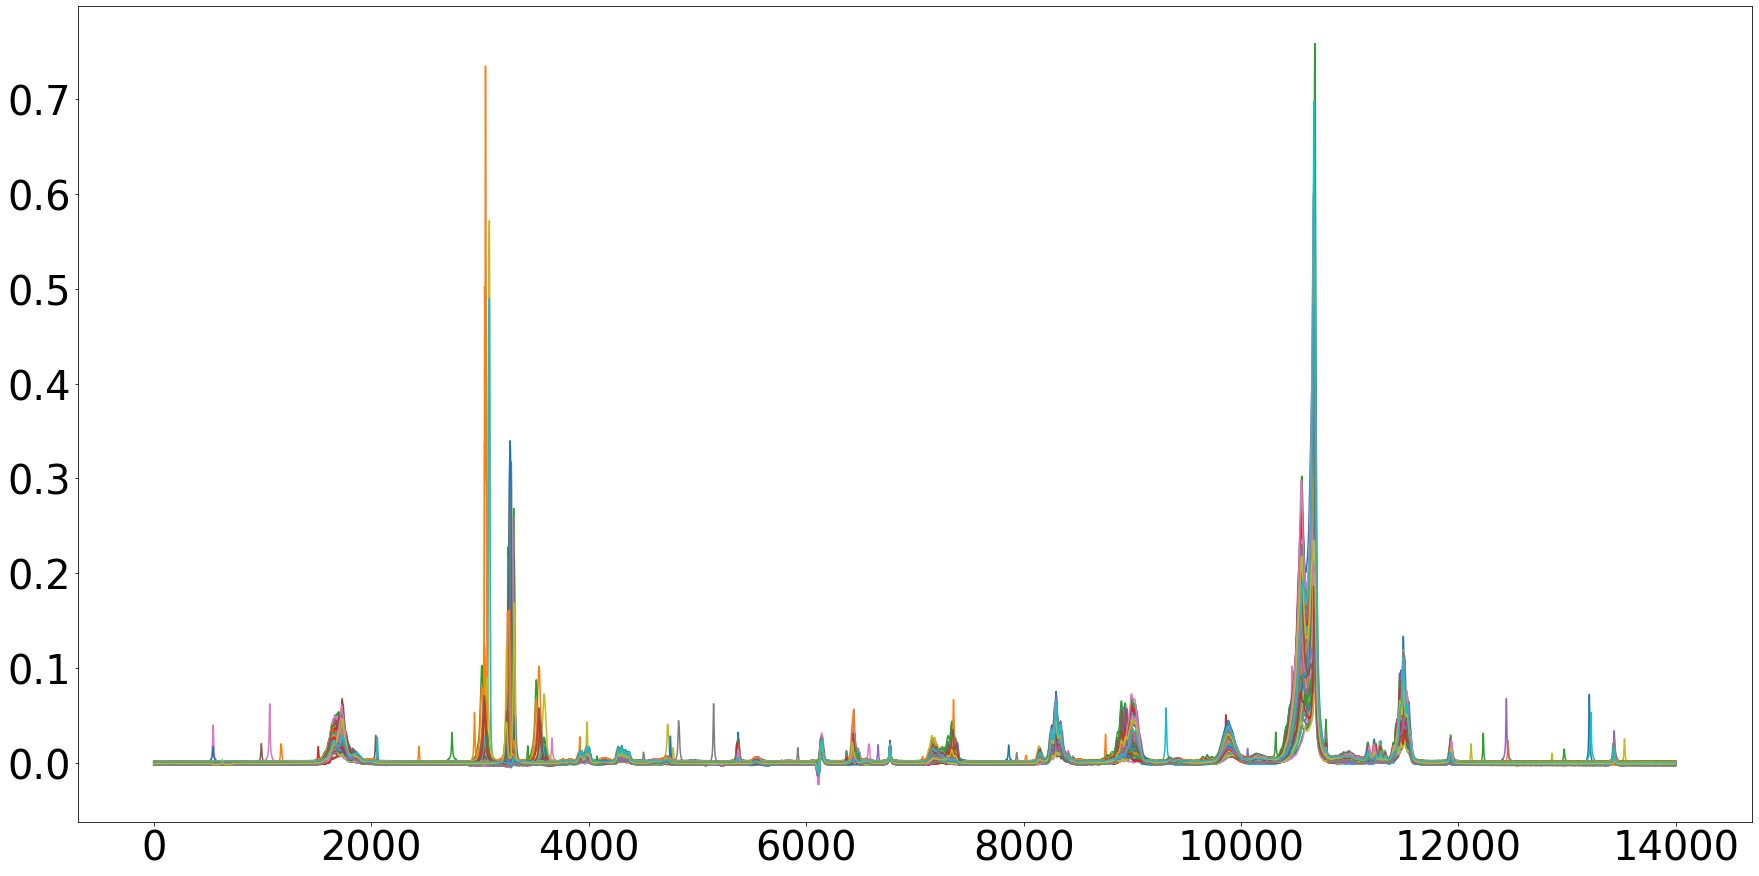

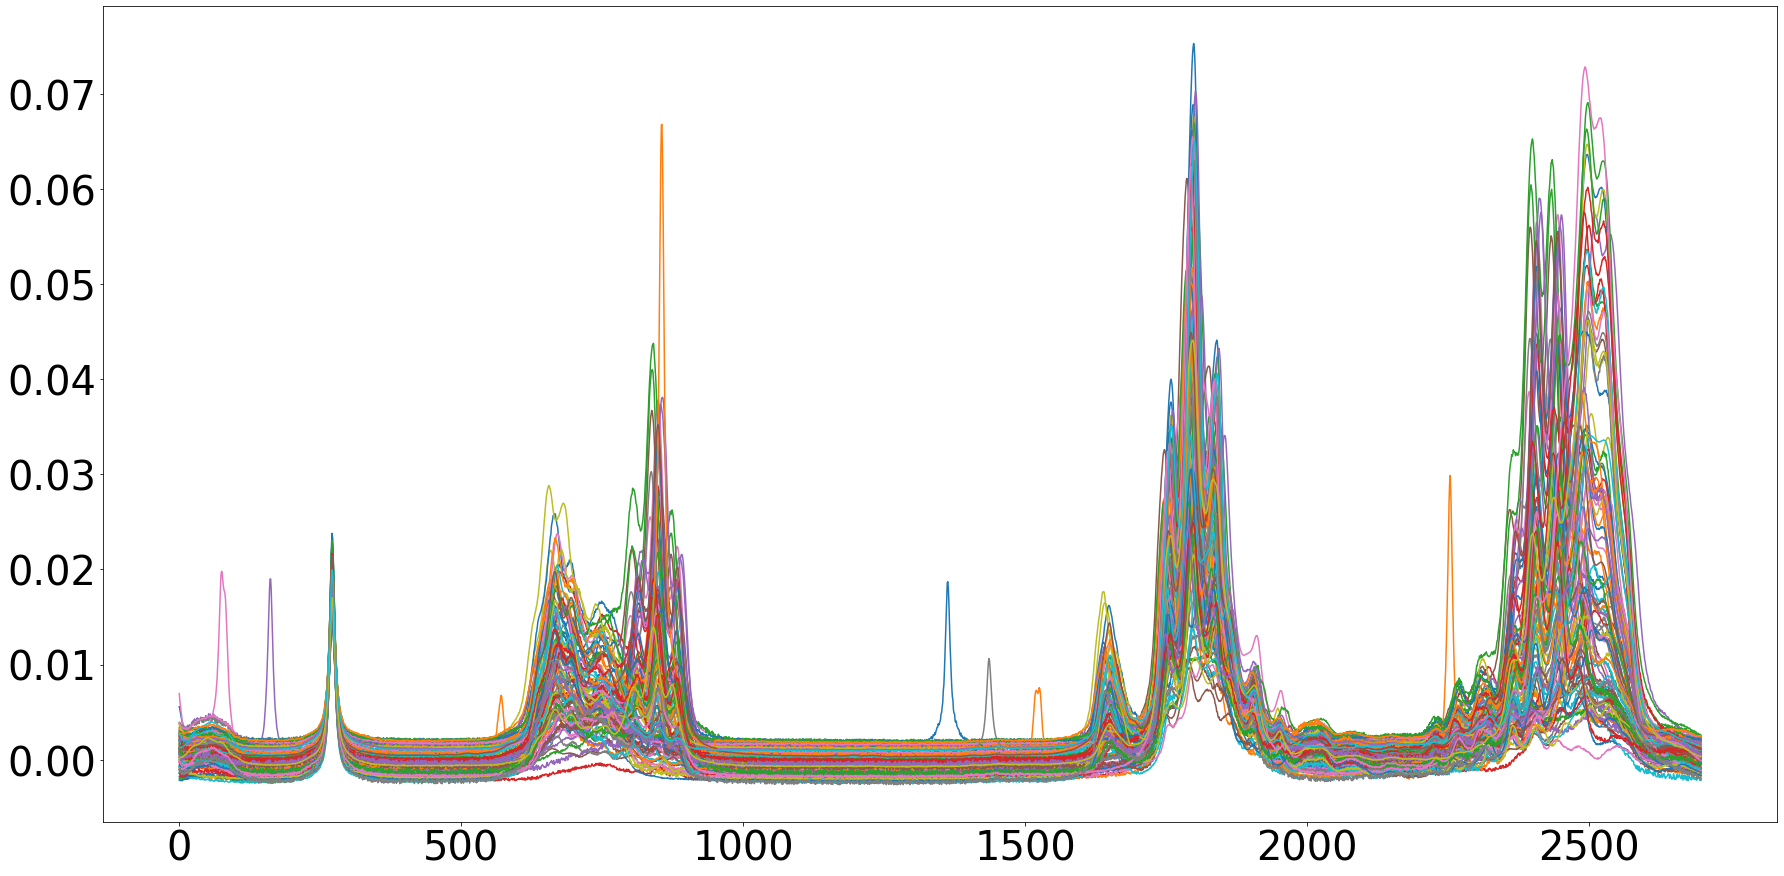

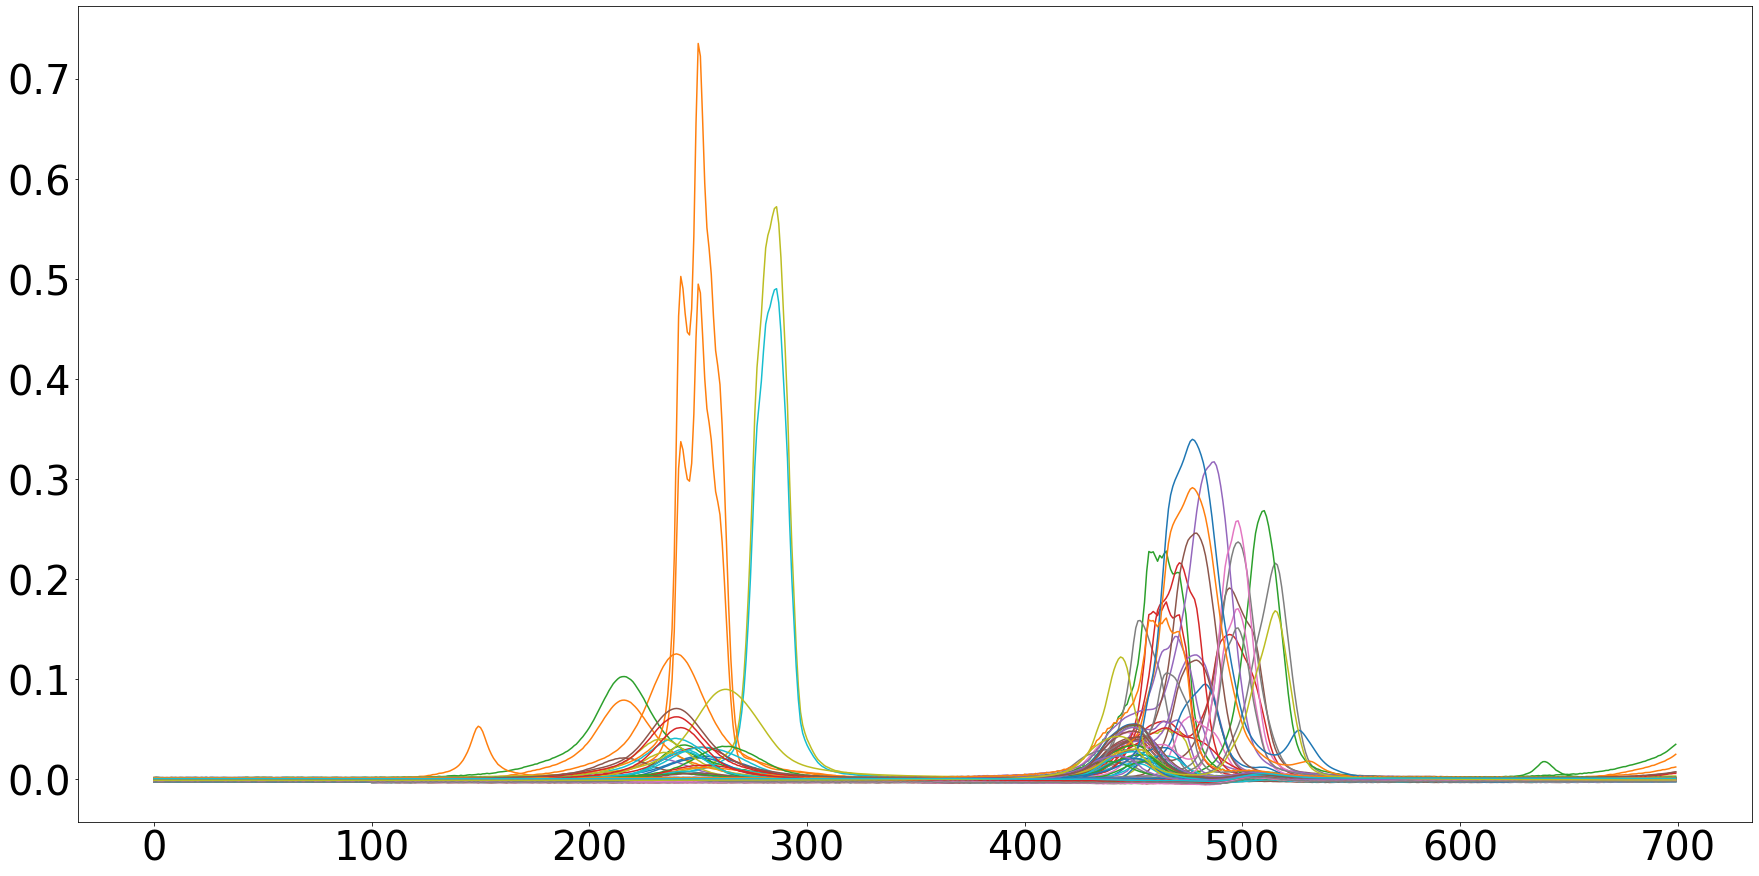

In [165]:
for i in np.arange(100):
    plt.plot(spec[i])
plt.show()
for i in np.arange(100):
    plt.plot(spec[i][6500:9200])
plt.show()
for i in np.arange(100):
    plt.plot(spec[i][2800:3500])

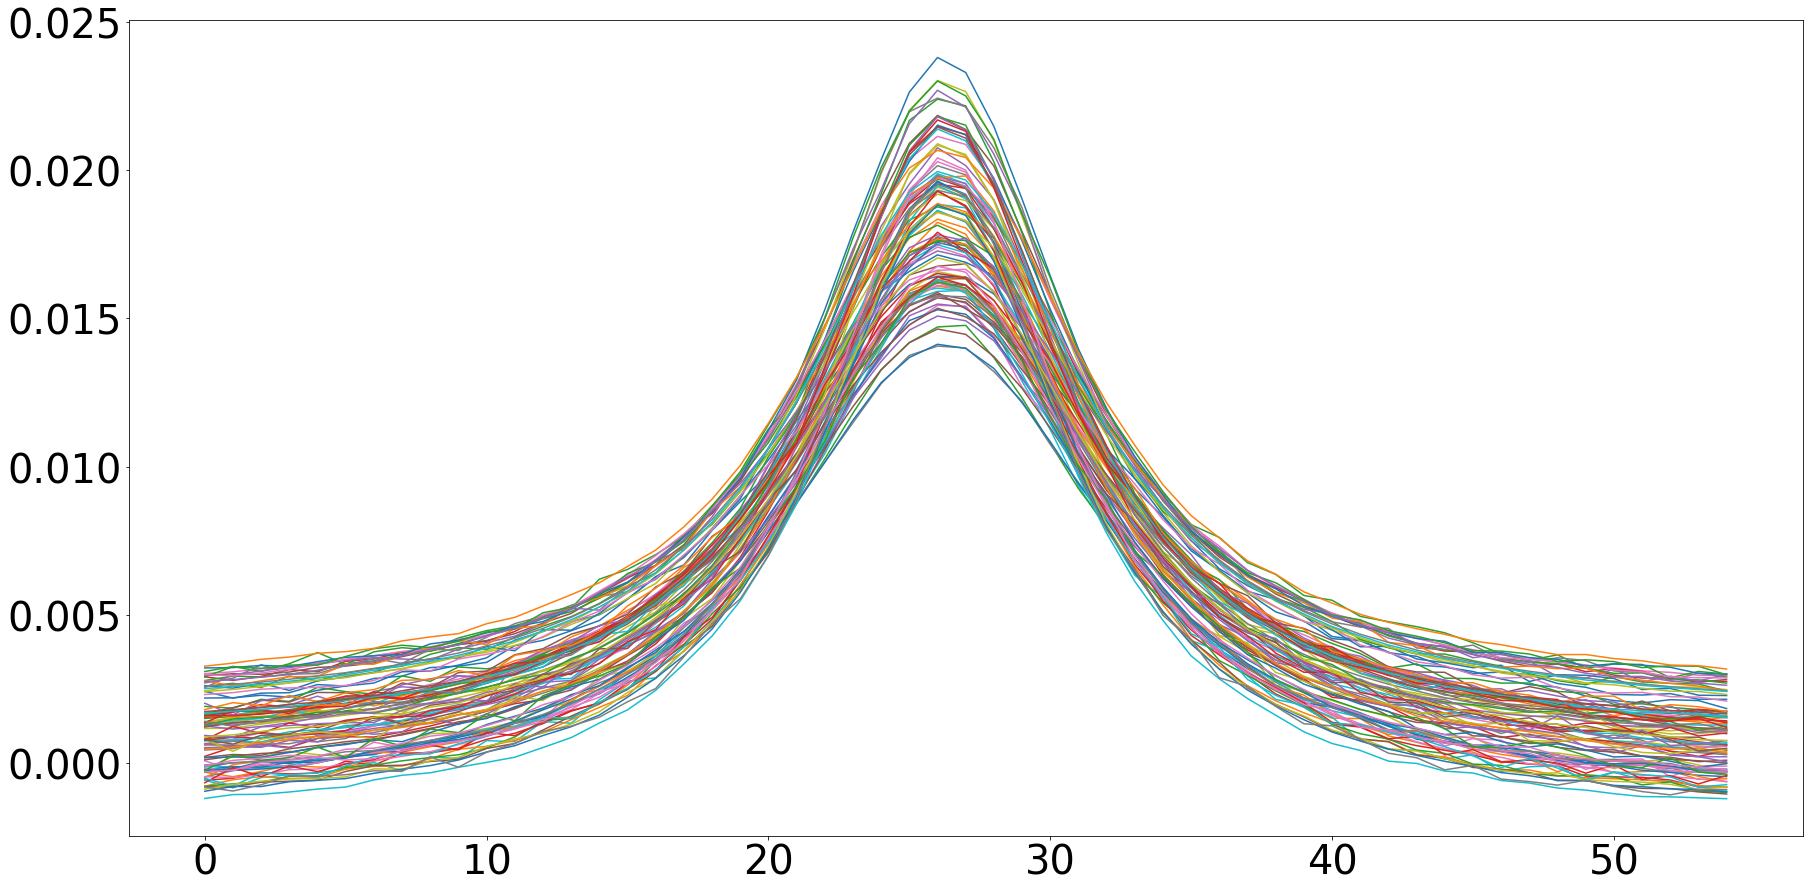

In [166]:
## Zoom in on DMSO2 peak overlay of 100 generated spectra, peaks should cluster in nine distinct zones corresponding to nine linebroadening constants

for i in np.arange(100):
    plt.plot(spec[i,6745:6800])

In [55]:
## Split dataset into testing and training sets, and reshape for network training

xtrain, xtest, ytrain, ytest = train_test_split(spec[:50000], conc_s[:50000], test_size=0.2)

xtrain = np.squeeze(xtrain)
xtest = np.squeeze(xtest)
ytrain = np.squeeze(ytrain)
ytest = np.squeeze(ytest)

#xtrain = np.squeeze(xtrain)
#xtest = np.squeeze(xtest)

In [65]:
## Create MLP architecture and training parameters/metrics definition

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(layers.Dense(200, input_dim=14000, kernel_initializer='he_uniform', activation='relu'))
#    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(18))
    model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [56]:
## Create the first MLP model definition and model.
start = time.time()

model = get_model(14000,18)
model.summary()

history = model.fit(xtrain, ytrain, batch_size=128, epochs=100,
validation_data=(xtest, ytest))

end = time.time()
print(end - start)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 200)               2800200   
                                                                 
 dense_9 (Dense)             (None, 18)                3618      
                                                                 
Total params: 2,803,818
Trainable params: 2,803,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 32s 88ms/step - loss: 0.0213 - root_mean_squared_error: 0.1460 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1508
Epoch 2/100
313/313 [==============================] - 20s 65ms/step - loss: 0.0106 - root_mean_squared_error: 0.1029 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 3/100
313/313 [==============================] - 24s 77ms/step - loss: 0.0082 - root

In [ ]:
#os.chdir("/home/htjhnson/Downloads")

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('MSE')
plt.ylabel('RMSE', fontsize=39)
plt.xlabel('Epoch', fontsize=39)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(['train', 'test'], loc='upper right', fontsize=40)
plt.rcParams["figure.figsize"] = (12,10)
#plt.savefig('Loss.svg')
#plt.savefig('Loss.png')


plt.show()

In [70]:
## Save trained model weights (Run this function once, then comment out and only run data loading function.)

#model.save_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_AddShiftsNoiseBroad_ThenBaseshift_ThenBroad_TwoEach_InterferencesMore_OutputScaled_50000ep')


## Load trained model
model = get_model(14000,18)

# Restore the weights
model.load_weights('./checkpoints/MLP_FftPhaRef2pt4lw_LinearCombinations_AddShiftsNoiseBroad_ThenBaseshift_ThenBroad_TwoEach_InterferencesMore_OutputScaled_50000ep')

In [71]:
ypred = model.predict(np.squeeze(spec[50000:]))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()


rmse = np.sqrt(((ypred - conc[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data")   

157/157 [==============================] - 4s 20ms/step
Tg 0.28
TC 0.15
TPL 0.17
TFA 0.47
PUFA 0.47
MUFA 0.63
SFA 0.47
Om3 0.25
Om6 0.5
Om9 0.66
LA 0.5
DHA 0.24
PC 0.18
PE 0.13
FC 0.16
EC 0.16
LPC 0.14
SM 0.08
Overall RMSE:  0.313
For MLP_FftPhaRefBas_LinearCombinations_50000ep synthetic data


In [72]:
ypred = model.predict(np.squeeze(spec[50000:]))

rmse = np.sqrt(((ypred - conc_s[50000:]) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec synthetic data")    

157/157 [==============================] - 3s 19ms/step
Tg 0.0039
TC 0.0076
TPL 0.0089
TFA 0.0019
PUFA 0.0047
MUFA 0.006
SFA 0.0049
Om3 0.0101
Om6 0.0058
Om9 0.0063
LA 0.006
DHA 0.019
PC 0.0147
PE 0.0164
FC 0.0166
EC 0.0134
LPC 0.0698
SM 0.0271
Overall RMSE:  0.0135
For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec synthetic data


In [73]:
ypred = model.predict((test))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
rmse = np.sqrt(((ypred - TestLipProfiles) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))
print("For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec experimental mixtures")

1/1 [==============================] - 0s 188ms/step
Tg 0.74
TC 0.32
TPL 0.18
TFA 2.44
PUFA 0.43
MUFA 1.07
SFA 1.31
Om3 0.18
Om6 0.35
Om9 1.06
LA 0.54
DHA 0.15
PC 0.62
PE 0.53
FC 0.33
EC 0.55
LPC 0.39
SM 0.16
Overall RMSE:  0.631
For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec experimental mixtures


In [74]:
ypred = model.predict((test))
    
    
rmse = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(4))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(4))
print("For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec experimental mixtures")

1/1 [==============================] - 0s 172ms/step
Tg 0.0101
TC 0.0166
TPL 0.0091
TFA 0.01
PUFA 0.0043
MUFA 0.0103
SFA 0.0135
Om3 0.0074
Om6 0.004
Om9 0.0102
LA 0.0065
DHA 0.0122
PC 0.0505
PE 0.0668
FC 0.0345
EC 0.0453
LPC 0.1927
SM 0.057
Overall RMSE:  0.0312
For MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBaseshiftBroad_50000spec experimental mixtures


In [75]:
for i in np.arange(18):
    print(LipList5[i],ypred[0,i],TestLipProfiles[0,i])

Tg 0.29113573 22.35417289
TC 0.07216748 1.357326245
TPL 0.05176965 1.281982745
TFA 0.2788802 71.56503082924351
PUFA 0.29808173 30.29539931233264
MUFA 0.13051468 15.260268084082881
SFA 0.25676775 26.009363432827993
Om3 0.27119556 6.73308223
Om6 0.26681033 23.56231708
Om9 0.13007429 15.26026808
LA 0.2666722 23.16029658
DHA 0.4329531 5.560059385
PC -0.030467873 0.55916761
PE 0.07737841 0.722815135
FC 0.06473052 0.6907358614174597
EC 0.062133964 1.279945128726704
LPC 0.34450626 0.0
SM 0.029730655 0.0


In [76]:
for i in np.arange(18):
    print(LipList5[i],ypred[7,i],TestLipProfiles[7,i])

Tg 0.4496629 31.29
TC 0.7462218 13.53
TPL 0.3870842 7.52
TFA 0.53020036 124.18062155656422
PUFA 0.20708957 20.661252254842733
MUFA 0.41252887 40.9344343511421
SFA 0.6837296 62.58493495057937
Om3 0.5294646 12.56
Om6 0.089163 8.1
Om9 0.41122407 40.93
LA 0.02736289 3.44
DHA 0.4602304 5.39
PC 0.36320588 5.12
PE 0.32663462 2.4
FC 0.61636364 5.424855615895182
EC 0.68507993 8.101939130557582
LPC 0.32619956 0.0
SM -0.028029844 0.0


In [77]:
for i in np.arange(18):
    print(LipList5[i],ypred[10,i],TestLipProfiles[10,i])

Tg 0.08186095 5.9733468229539115
TC 0.27592418 5.477918917274888
TPL 0.40281743 7.966964261844273
TFA 0.14896005 36.72010787906996
PUFA 0.10947103 10.904753803555007
MUFA 0.06430015 6.753704222659818
SFA 0.19170606 18.638122721072186
Om3 0.22450434 5.365346001859296
Om6 0.06374416 5.5394078016957105
Om9 0.064178415 6.653515008689658
LA 0.061892577 5.1055198207122015
DHA 0.36528763 4.489488944764286
PC 0.334685 2.9359401670895613
PE 0.3398558 3.9462173794114497
FC 0.44756043 4.441581390766806
EC 0.0788574 1.0363375265080814
LPC 0.27357763 0.6612795835603171
SM 0.20427547 0.42352713178294576


## Calculate MAPE

In [78]:
## Mean percent error for first 16 lipid groups
mpe1 = (abs(TestLipProfiles_s[:,:16] - ypred[:,:16])/TestLipProfiles_s[:,:16]).mean(axis=0)*100

## Mean percent error for last 2 lipid groups (separated as they are only in included in the last three experimental spectra)
mpe2 = (abs(TestLipProfiles_s[8:11,16:] - ypred[8:11,16:])/TestLipProfiles_s[8:11,16:]).mean(axis=0)*100

## Join all 18 lipids into the same list and print mean percent error for each lipid group quantified
mpe_all = np.concatenate((np.array(mpe1),np.array(mpe2)),axis=0)
for i in np.arange(18):
    print(LipList5[i],mpe_all[i].round(2))
    
mape = mpe_all.mean()
print(mape)

Tg 4.12
TC 4.88
TPL 5.11
TFA 3.29
PUFA 1.93
MUFA 6.85
SFA 3.21
Om3 2.99
Om6 2.72
Om9 6.14
LA 5.35
DHA 3.88
PC 35.28
PE 11.65
FC 11.19
EC 22.09
LPC 19.43
SM 33.25
10.18682109760191


## Check if Adding common interference signals messes with quantification of lipid metabolites.

In [239]:
#test = test/110430.02

In [240]:
## Load Liver Data

os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT")




testFiles = ['NGR_Liver_Lipids_1__proton-1-3.fid', 'NGR_Liver_Lipid_2_PROTON-1-3.fid', 'NGR_Liver_Lipids_3__proton-1-3.fid', 'NGR_Liver_Lipid_4_second__proton-1-3.fid','NGR_Liver_Lipid_5__PROTON-4-3.fid', 'NGR_Liver_Lipids_17__proton-1-3.fid','NGR_Liver_Lipids_18_PROTON-1-3.fid','NGR_Liver_Lipid_19_PROTON-1-3.fid','NGR_Liver_Lipid_21_second_half__proton-1-3.fid','NGR_Liver_Lipids_22_proton-1-3.fid','NGR_Liver_Lipids_23_PROTON-1-3.fid','NGR_Liver_Lipid_24_4th_half__proton-1-3.fid','NGR_Liver_25_Lipids___proton-1-3.fid','NGR_Liver_Lipids_36_PROTON-1-3.fid','NGR_Liver_Lipids_37_PROTON-2-3.fid','NGR_Liver_Lipids_39__proton-1-3.fid']
        
testFlist = []
for i in testFiles:
    testFlist.append(i[4:19])
    
testFlist = testFlist[:32]

LiverDic = []
LiverData = []
for i in range(len(testFlist)):
    globals()[testFlist[i]+ '_' + 'Dic'],globals()[testFlist[i]+ '_' + 'Data'] = ng.pipe.read(testFiles[i])
    LiverDic.append(globals()[testFlist[i]+ '_' + 'Dic'])
    LiverData.append(globals()[testFlist[i]+ '_' + 'Data'])
    
    
for i in np.arange(16):
    LiverDic[i],LiverData[i] = ng.process.pipe_proc.ft(LiverDic[i],LiverData[i])
    
for i in np.arange(16):
    LiverData[i] = LiverData[i].real
    
for i in np.arange(16):
    LiverData[i] = np.reshape(LiverData[i], (32768,1))
    
#for i in np.arange(16):
#    LiverData[i] = LiverData[i]/OvMax
    
    
    
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LiverCRAFT1 = pd.read_excel('Liver_AdLib_AllData_half_reodered_adj.xlsx', index_col=0)
LipListCRAFT = ['Tg','TC','TFA','PUFA','MUFA','SFA','UFA','Om3','LA','PC','PE','SM','PUFAp','MUFAp','SFAp']

LiverData = np.array(LiverData)[:,14000:28000]
LiverData = LiverData/110430.02

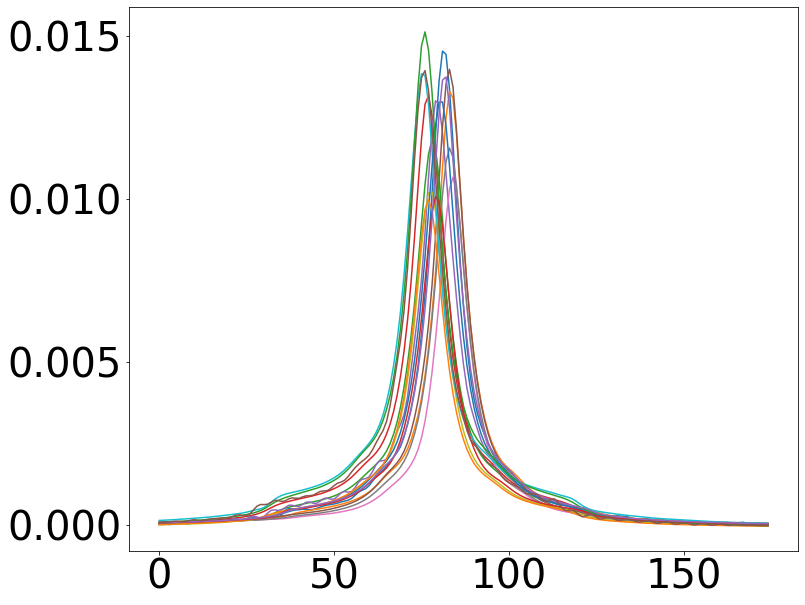

In [241]:
for i in np.arange(16):
    plt.plot(LiverData[i][13350:13525])

## First with TMS

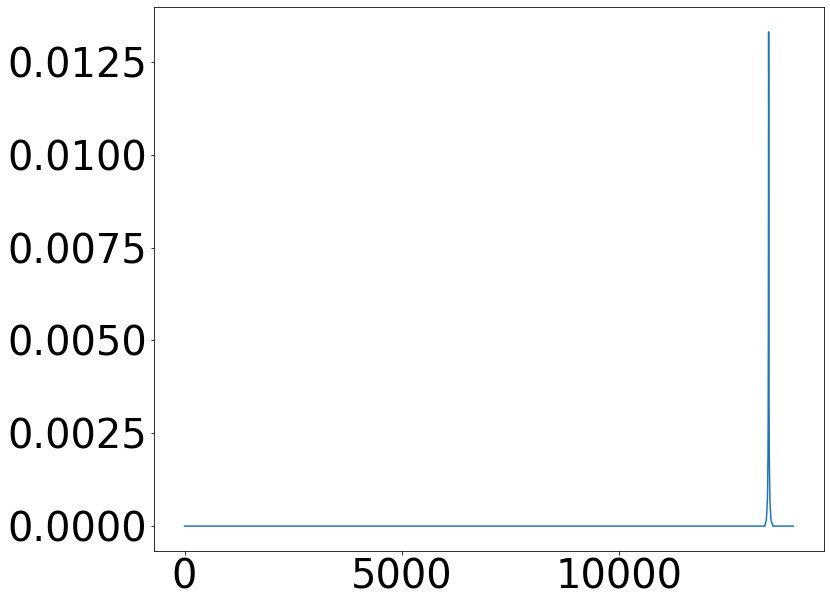

In [242]:
# Isolate TMS signal from one hepatic spectra
TMS = LiverData[1].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])
plt.plot(TMS)

# Add TMS signal to each experimental lipid mixture
test_TMS = test.copy()
for i in np.arange(11):
    test_TMS[i] = test_TMS[i] + TMS

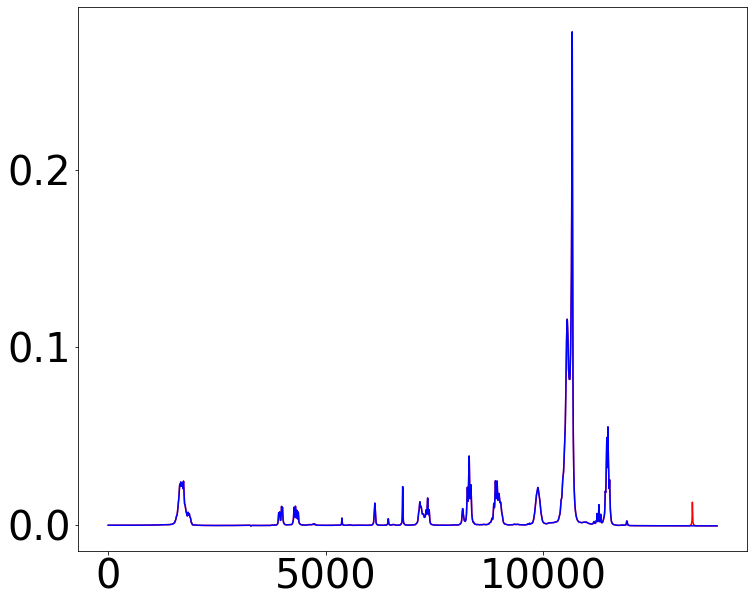

In [243]:
## Check if signal has been added

plt.plot(test_TMS[0],color='r')
plt.plot(test[0],color='b')

In [244]:
## Predict concentrations for experimental dataset with and without TMS added

ypred = model.predict(test)
ypred_TMS = model.predict(test_TMS)

1/1 [==============================] - 0s 22ms/step


In [245]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_TMS[0][i])

Tg 0.29113573 0.2907696
TC 0.07216748 0.07148453
TPL 0.05176965 0.050988168
TFA 0.2788802 0.27843925
PUFA 0.29808173 0.29749265
MUFA 0.13051468 0.13051316
SFA 0.25676775 0.2563637
Om3 0.27119556 0.270581
Om6 0.26681033 0.26630852
Om9 0.13007429 0.13011809
LA 0.2666722 0.26628038
DHA 0.4329531 0.43264142
PC -0.030467873 -0.030631756
PE 0.07737841 0.076906554
FC 0.06473052 0.06319035
EC 0.062133964 0.062195003
LPC 0.34450626 0.33669376
SM 0.029730655 0.031360626


In [246]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_TMS[1][i])

Tg 0.23109299 0.2303083
TC 0.13081147 0.1297344
TPL 0.123377606 0.12348664
TFA 0.24383414 0.24354982
PUFA 0.25905302 0.2585594
MUFA 0.11129226 0.11138721
SFA 0.22864874 0.22839274
Om3 0.2682348 0.2678766
Om6 0.22358003 0.22303517
Om9 0.1108615 0.11092303
LA 0.21898545 0.21862394
DHA 0.3452992 0.34509417
PC 0.07275525 0.07294889
PE 0.17521244 0.17455433
FC 0.11370153 0.111031696
EC 0.115580894 0.1160023
LPC 0.07035929 0.072086476
SM 0.009661794 0.009353407


## Now with MTBE

In [247]:
# Isolate MTBE signal from one hepatic spectra
MTBE = LiverData[6].copy()

MTBE[:6355] = np.zeros([6355,1])
MTBE[6385:10775] = np.zeros([10775-6385,1])
MTBE[10800:] = np.zeros([3200,1])

MTBE = np.reshape(MTBE,[14000])


# Add MTBE signal to each experimental lipid mixture
test_MTBE = test.copy()
for i in np.arange(11):
    test_MTBE[i] = test_MTBE[i] + MTBE*2

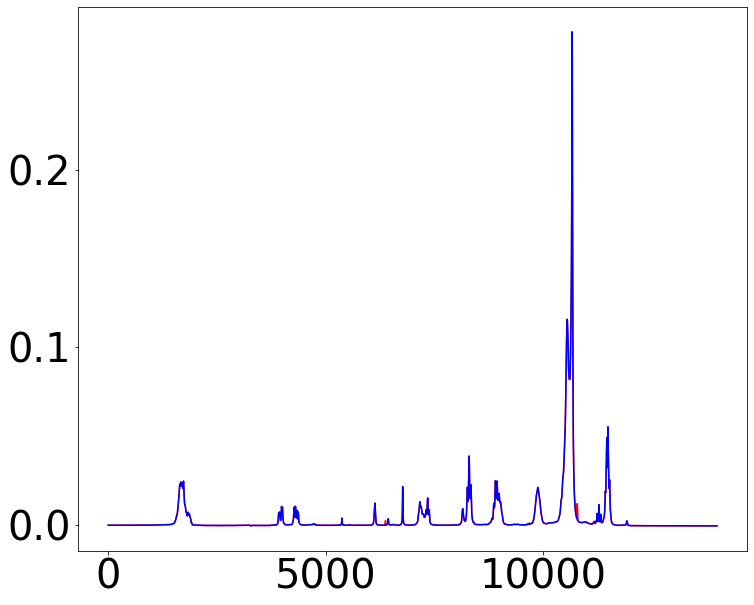

In [248]:
## Check if signal has been added

plt.plot(test_MTBE[0],color='r')
plt.plot(test[0],color='b')

In [249]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_MTBE = model.predict(test_MTBE)

1/1 [==============================] - 0s 19ms/step


In [250]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_MTBE[0][i])

Tg 0.29113573 0.29173464
TC 0.07216748 0.0725906
TPL 0.05176965 0.051943094
TFA 0.2788802 0.2791796
PUFA 0.29808173 0.29842865
MUFA 0.13051468 0.13047926
SFA 0.25676775 0.25713423
Om3 0.27119556 0.2718893
Om6 0.26681033 0.26695508
Om9 0.13007429 0.12990095
LA 0.2666722 0.26698932
DHA 0.4329531 0.43332428
PC -0.030467873 -0.03045241
PE 0.07737841 0.07791985
FC 0.06473052 0.064590484
EC 0.062133964 0.06303627
LPC 0.34450626 0.3422572
SM 0.029730655 0.031705283


In [251]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_MTBE[1][i])

Tg 0.23109299 0.23176852
TC 0.13081147 0.13113052
TPL 0.123377606 0.12277944
TFA 0.24383414 0.24407959
PUFA 0.25905302 0.2593262
MUFA 0.11129226 0.111226186
SFA 0.22864874 0.22898619
Om3 0.2682348 0.26887983
Om6 0.22358003 0.22365256
Om9 0.1108615 0.110667095
LA 0.21898545 0.21926266
DHA 0.3452992 0.34582275
PC 0.07275525 0.07251339
PE 0.17521244 0.17524168
FC 0.11370153 0.11340254
EC 0.115580894 0.11644699
LPC 0.07035929 0.066299275
SM 0.009661794 0.010345444


In [252]:
#test=test/OvMax

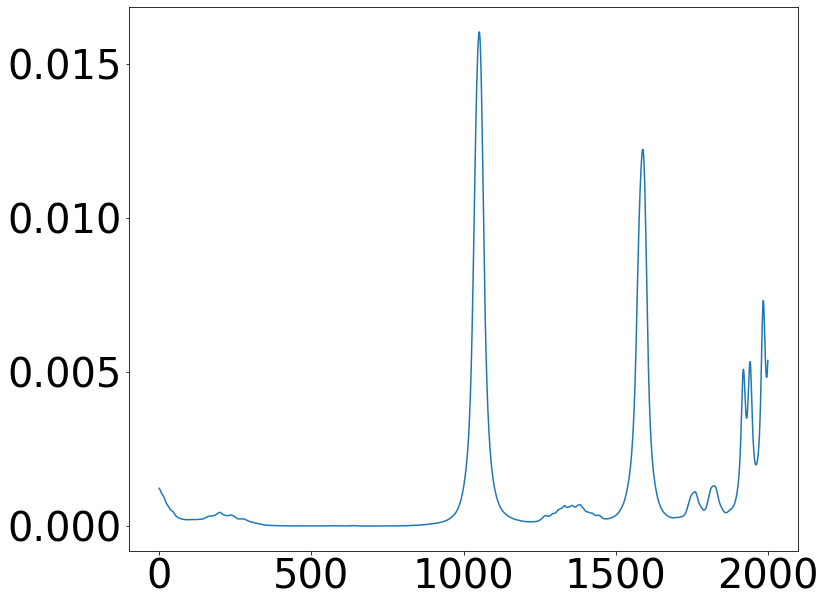

In [253]:
plt.plot(LiverData[1][2000:4000])

## Now with water signal two peak version

In [254]:
# Isolate Water signal from one hepatic spectra
Water = LiverData[6].copy()

Water[:2900] = np.zeros([2900,1])
Water[3700:] = np.zeros([10300,1])

Water = np.reshape(Water,[14000])


# Add water signal to each experimental lipid mixture
test_Water = test.copy()
for i in np.arange(11):
    test_Water[i] = test_Water[i] + Water

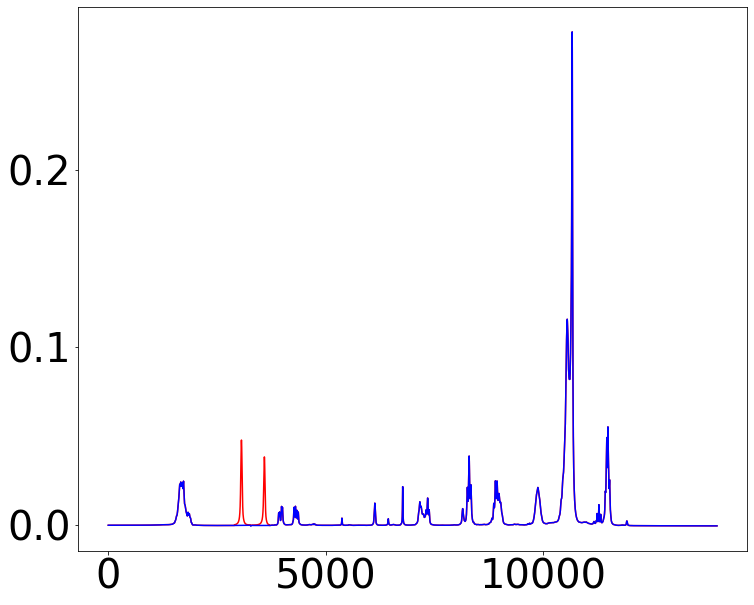

In [255]:
## Check if signal has been added

plt.plot(test_Water[0],color='r')
plt.plot(test[0],color='b')

In [256]:
## Predict concentrations for experimental dataset with and without water added

ypred = model.predict(test)
ypred_Water = model.predict(test_Water)

1/1 [==============================] - 0s 17ms/step


In [257]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_Water[0][i])

Tg 0.29113573 0.29015425
TC 0.07216748 0.0716851
TPL 0.05176965 0.052799687
TFA 0.2788802 0.27873856
PUFA 0.29808173 0.29742482
MUFA 0.13051468 0.13094483
SFA 0.25676775 0.25667104
Om3 0.27119556 0.2704055
Om6 0.26681033 0.2662722
Om9 0.13007429 0.1302765
LA 0.2666722 0.26556033
DHA 0.4329531 0.43036062
PC -0.030467873 -0.028574683
PE 0.07737841 0.078573726
FC 0.06473052 0.06439592
EC 0.062133964 0.06149519
LPC 0.34450626 0.33917734
SM 0.029730655 0.025802203


In [258]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_Water[1][i])

Tg 0.23109299 0.23039696
TC 0.13081147 0.13014996
TPL 0.123377606 0.122856796
TFA 0.24383414 0.24354392
PUFA 0.25905302 0.25821105
MUFA 0.11129226 0.11167711
SFA 0.22864874 0.22832297
Om3 0.2682348 0.2675201
Om6 0.22358003 0.22290637
Om9 0.1108615 0.1110679
LA 0.21898545 0.21777128
DHA 0.3452992 0.34309173
PC 0.07275525 0.073360175
PE 0.17521244 0.1751186
FC 0.11370153 0.11246957
EC 0.115580894 0.11565513
LPC 0.07035929 0.066056356
SM 0.009661794 0.0029722527


## Now with the single peak water signal

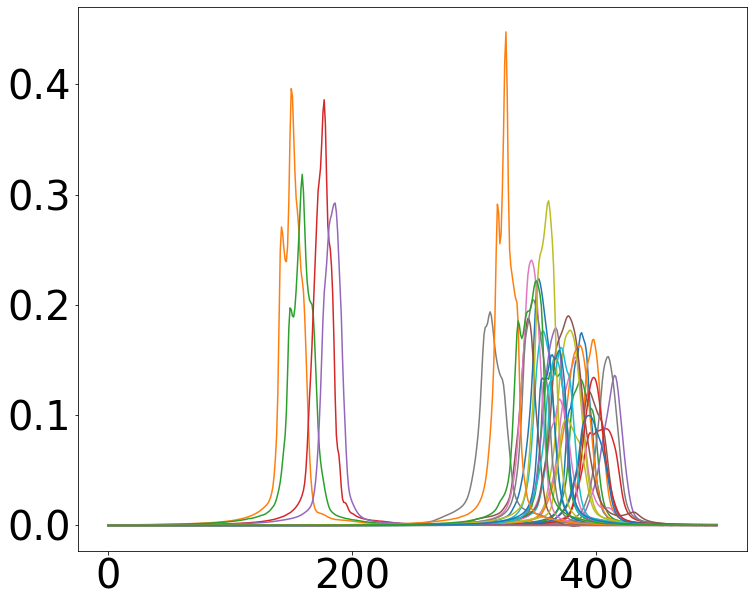

In [259]:
## Create variables for all file names of generated dataset
# Initialize some list variables
x1f = []
for filename in os.listdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth"):
    if filename.startswith("D") == True:
        x1f.append(filename)

            
            
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/WaterSignals_FFTPhaseRefdBasec_Smooth")

# Initialize some list variables
x1 = []
x1d = []
# Read and append to list all FIDs and lipid profile values from data generation.
for i in np.arange(len(x1f)):
    xd,x = ng.pipe.read(x1f[i])
    x1d.append(xd)
    x1.append(x[14000:28000].real/OvMax)

x1 = np.array(x1)


for i in np.arange(33):
    plt.plot(x1[i][2900:3400])

In [260]:
# Isolate Water signal from one hepatic spectra
r = random.choice(np.arange(33))
wat = x1[r]

wat[:2900] = np.zeros([2900])
wat[3400:] = np.zeros([10600])

wat = np.reshape(wat,[14000])


# Add water signal to each experimental lipid mixture
test_wat = test.copy()
for i in np.arange(11):
    test_wat[i] = test_wat[i] + wat

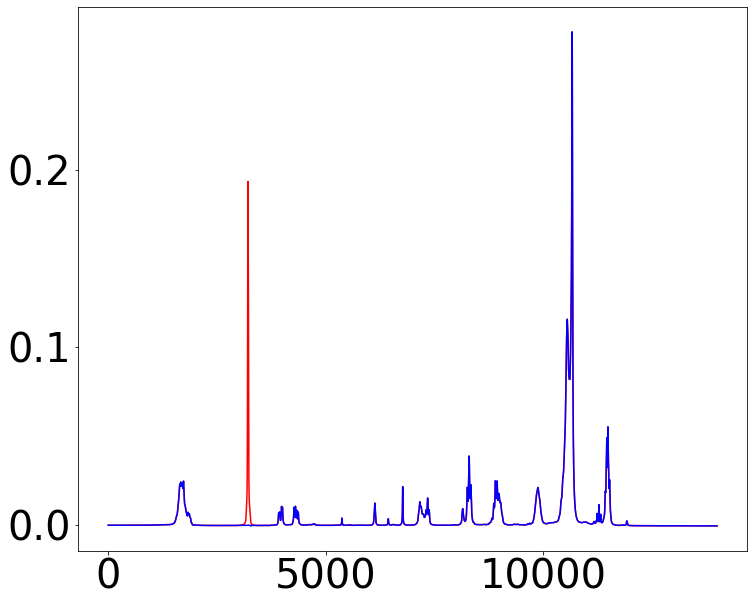

In [261]:
## Check if signal has been added

plt.plot(test_wat[0],color='r')
plt.plot(test[0],color='b')

In [262]:
## Predict concentrations for experimental dataset with and without water added

ypred = model.predict(test)
ypred_wat = model.predict(test_wat)

1/1 [==============================] - 0s 20ms/step


In [263]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_wat[0][i])

Tg 0.29113573 0.2921889
TC 0.07216748 0.07360766
TPL 0.05176965 0.04795512
TFA 0.2788802 0.27866882
PUFA 0.29808173 0.30003166
MUFA 0.13051468 0.12963253
SFA 0.25676775 0.25603288
Om3 0.27119556 0.27270743
Om6 0.26681033 0.26880035
Om9 0.13007429 0.12841544
LA 0.2666722 0.26915836
DHA 0.4329531 0.4360947
PC -0.030467873 -0.031543113
PE 0.07737841 0.080172926
FC 0.06473052 0.066896565
EC 0.062133964 0.06530696
LPC 0.34450626 0.3070737
SM 0.029730655 0.013657123


In [264]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_wat[1][i])

Tg 0.23109299 0.23219472
TC 0.13081147 0.13248777
TPL 0.123377606 0.12026985
TFA 0.24383414 0.2436369
PUFA 0.25905302 0.26113775
MUFA 0.11129226 0.110441476
SFA 0.22864874 0.22784595
Om3 0.2682348 0.26986682
Om6 0.22358003 0.22563522
Om9 0.1108615 0.10922668
LA 0.21898545 0.22148462
DHA 0.3452992 0.3480282
PC 0.07275525 0.07078819
PE 0.17521244 0.17911777
FC 0.11370153 0.117428295
EC 0.115580894 0.117866985
LPC 0.07035929 0.03875833
SM 0.009661794 -0.0046995506


## Now without EPAm peak ~3.63 ppm

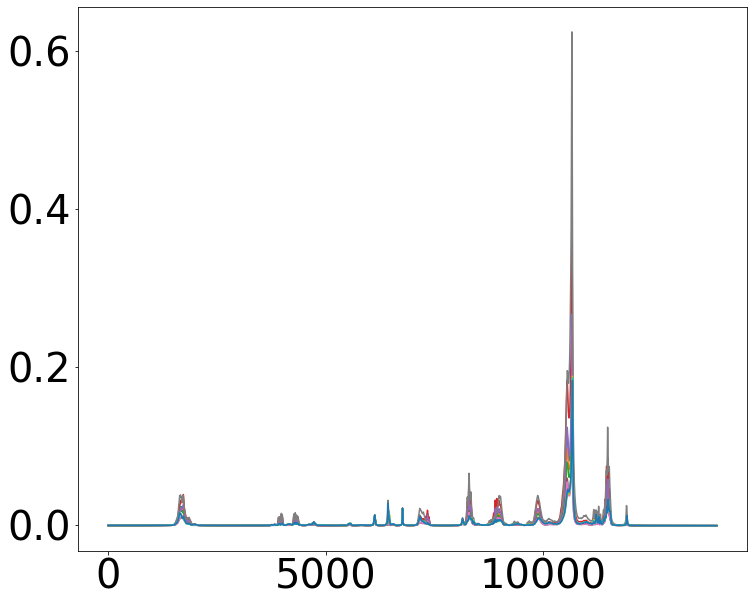

In [265]:

# Add MTBE signal to each experimental lipid mixture
NoEPAm = test.copy()

for i in np.arange(11):
    NoEPAm[i][5325:5425] = NoEPAm[i][:100]
    plt.plot(NoEPAm[i])
    
#NoEPAm = np.reshape(NoEPAm,[14000])


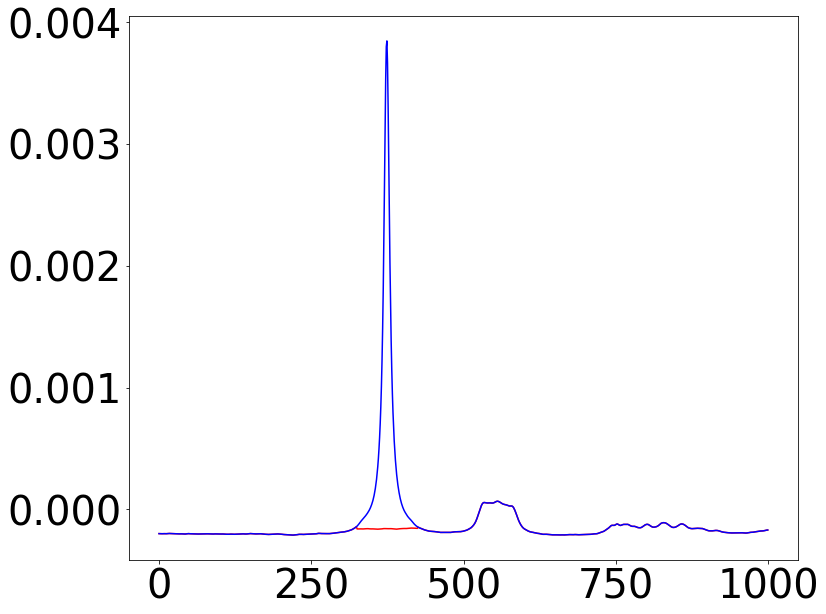

In [266]:
## Check if signal has been deleted

plt.plot(NoEPAm[0][5000:6000],color='r')
plt.plot(test[0][5000:6000],color='b')

In [377]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_NoEPAm = model.predict(NoEPAm)

1/1 [==============================] - 0s 18ms/step


In [378]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_NoEPAm[0][i])

Tg 0.29113573 0.29459593
TC 0.07216748 0.07330451
TPL 0.05176965 0.05182512
TFA 0.2788802 0.2783472
PUFA 0.29808173 0.2968642
MUFA 0.13051468 0.13028818
SFA 0.25676775 0.2563615
Om3 0.27119556 0.24887714
Om6 0.26681033 0.27171102
Om9 0.13007429 0.1296122
LA 0.2666722 0.26550415
DHA 0.4329531 0.4686458
PC -0.030467873 -0.030010631
PE 0.07737841 0.076905735
FC 0.06473052 0.068455786
EC 0.062133964 0.060868062
LPC 0.34450626 0.34408113
SM 0.029730655 0.02932822


In [379]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_NoEPAm[1][i])

Tg 0.23109299 0.23783341
TC 0.13081147 0.13315308
TPL 0.123377606 0.12401317
TFA 0.24383414 0.24282026
PUFA 0.25905302 0.25671276
MUFA 0.11129226 0.11086455
SFA 0.22864874 0.22786663
Om3 0.2682348 0.22471893
Om6 0.22358003 0.23318172
Om9 0.1108615 0.10996549
LA 0.21898545 0.2167145
DHA 0.3452992 0.4151252
PC 0.07275525 0.07385993
PE 0.17521244 0.17459738
FC 0.11370153 0.12133052
EC 0.115580894 0.11304171
LPC 0.07035929 0.07050275
SM 0.009661794 0.0098961815


## Add TMS signal in different location (random signal essentially)

In [270]:
# Isolate TMS signal from one hepatic spectra
TMS = LiverData[1].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])

## Define interference signal
t = np.zeros(14000)
t[7500:7675] = TMS[13350:13525]

# Add TMS signal to each experimental lipid mixture
test_t = test.copy()
for i in np.arange(11):
    test_t[i] = test_t[i]+ t

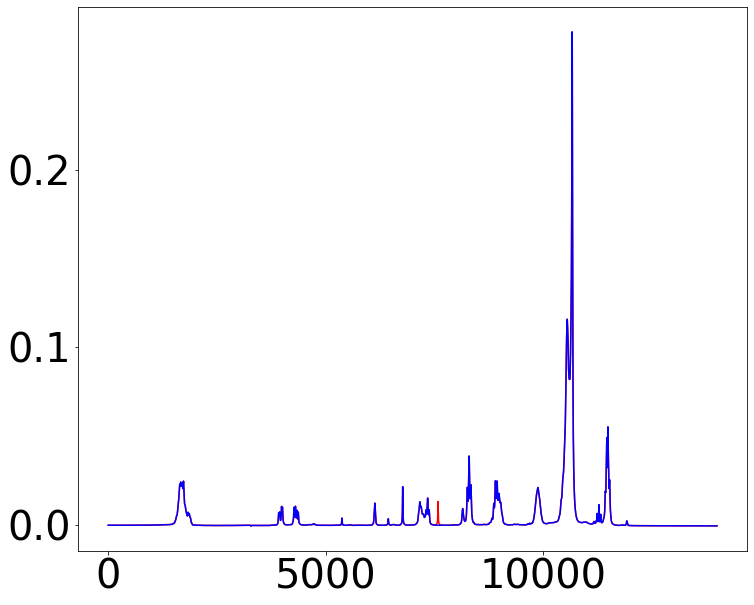

In [271]:
## Check if signal has been added

plt.plot(test_t[0],color='r')
plt.plot(test[0],color='b')

In [272]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_test_t = model.predict(test_t)

1/1 [==============================] - 0s 18ms/step


In [273]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_test_t[0][i])

Tg 0.29113573 0.29143018
TC 0.07216748 0.0714939
TPL 0.05176965 0.050817028
TFA 0.2788802 0.27911747
PUFA 0.29808173 0.29842782
MUFA 0.13051468 0.13027494
SFA 0.25676775 0.2570501
Om3 0.27119556 0.2718954
Om6 0.26681033 0.2668856
Om9 0.13007429 0.1294883
LA 0.2666722 0.2666507
DHA 0.4329531 0.43469167
PC -0.030467873 -0.031754836
PE 0.07737841 0.078559585
FC 0.06473052 0.064987764
EC 0.062133964 0.061079886
LPC 0.34450626 0.34426796
SM 0.029730655 0.028587304


In [274]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_test_t[1][i])

Tg 0.23109299 0.23160478
TC 0.13081147 0.1298427
TPL 0.123377606 0.120236106
TFA 0.24383414 0.24391803
PUFA 0.25905302 0.25918964
MUFA 0.11129226 0.110965684
SFA 0.22864874 0.22884874
Om3 0.2682348 0.2687966
Om6 0.22358003 0.22344989
Om9 0.1108615 0.110215835
LA 0.21898545 0.21885078
DHA 0.3452992 0.34746975
PC 0.07275525 0.070738256
PE 0.17521244 0.17494099
FC 0.11370153 0.11350793
EC 0.115580894 0.11442389
LPC 0.07035929 0.06498326
SM 0.009661794 0.0048561767


In [275]:
# Isolate TMS signal from one hepatic spectra to a second location in the test spectra
TMS = LiverData[1].copy()
TMS[:13350] = np.zeros([13350,1])
TMS[13525:] = np.zeros([475,1])
TMS = np.reshape(TMS,[14000])

## Define interference signal
t2 = np.zeros(14000)
t2[2200:2375] = TMS[13350:13525]

# Add TMS signal to each experimental lipid mixture
test_t2 = test.copy()
for i in np.arange(11):
    test_t2[i] = test_t2[i]+ t2

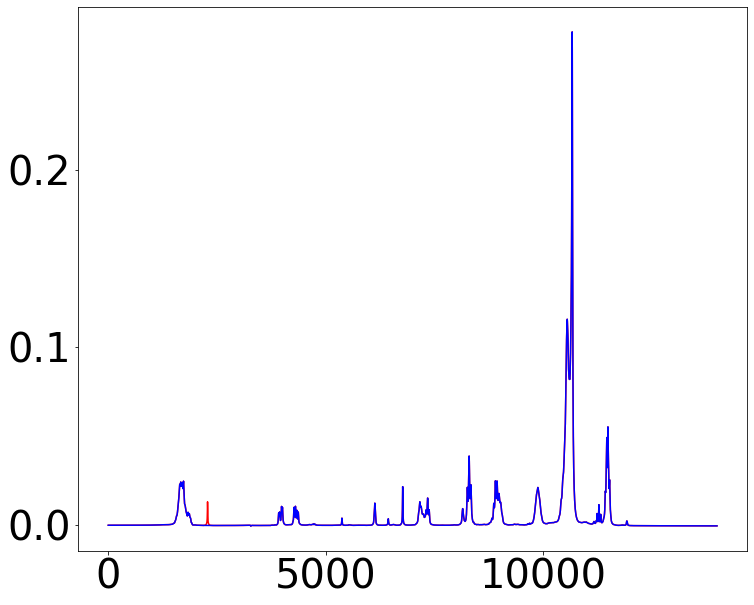

In [276]:
## Check if signal has been added

plt.plot(test_t2[0],color='r')
plt.plot(test[0],color='b')

In [277]:
## Predict concentrations for experimental dataset with and without MTBE added

ypred = model.predict(test)
ypred_test_t = model.predict(test_t2)

1/1 [==============================] - 0s 17ms/step


In [278]:
for i in np.arange(18):
    print(LipList5[i],ypred[0][i],ypred_test_t[0][i])

Tg 0.29113573 0.291467
TC 0.07216748 0.07185083
TPL 0.05176965 0.04693678
TFA 0.2788802 0.27832106
PUFA 0.29808173 0.29733238
MUFA 0.13051468 0.13026072
SFA 0.25676775 0.25658965
Om3 0.27119556 0.2712727
Om6 0.26681033 0.26611465
Om9 0.13007429 0.12966222
LA 0.2666722 0.2656246
DHA 0.4329531 0.43393797
PC -0.030467873 -0.03251027
PE 0.07737841 0.07556413
FC 0.06473052 0.06444616
EC 0.062133964 0.062245384
LPC 0.34450626 0.32818377
SM 0.029730655 0.025297828


In [279]:
for i in np.arange(18):
    print(LipList5[i],ypred[1][i],ypred_test_t[1][i])

Tg 0.23109299 0.23109299
TC 0.13081147 0.13094504
TPL 0.123377606 0.121883325
TFA 0.24383414 0.24350896
PUFA 0.25905302 0.25862342
MUFA 0.11129226 0.111170605
SFA 0.22864874 0.22859637
Om3 0.2682348 0.26852235
Om6 0.22358003 0.22319782
Om9 0.1108615 0.11054032
LA 0.21898545 0.2181105
DHA 0.3452992 0.34562543
PC 0.07275525 0.07182644
PE 0.17521244 0.1756139
FC 0.11370153 0.11410483
EC 0.115580894 0.11584928
LPC 0.07035929 0.061872993
SM 0.009661794 0.010814682


## Now test RMSE with all interference signals added

In [285]:
# Add all interference signals to each experimental lipid mixture
test_t_All = test.copy()
for i in np.arange(11):
    TMS[13350:13525] = TMS[13350:13525] - (TMS[13350:13525].min() - test[i][:1000].mean())
    MTBE[6355:6385] = MTBE[6355:6385] - (MTBE[6355:6385].min() - test[i][:1000].mean())
    MTBE[10775:10800] = MTBE[10775:10800] - (MTBE[10775:10800].min() - test[i][:1000].mean())
    t[7500:7675] = t[7500:7675] - (t[7500:7675].min() - test[i][:1000].mean())
    t2[2200:2375] = t2[2200:2375] - (t2[2200:2375].min() - test[i][:1000].mean())
    test_t_All[i] = test_t[i]+ t + t2 + TMS + Water + MTBE

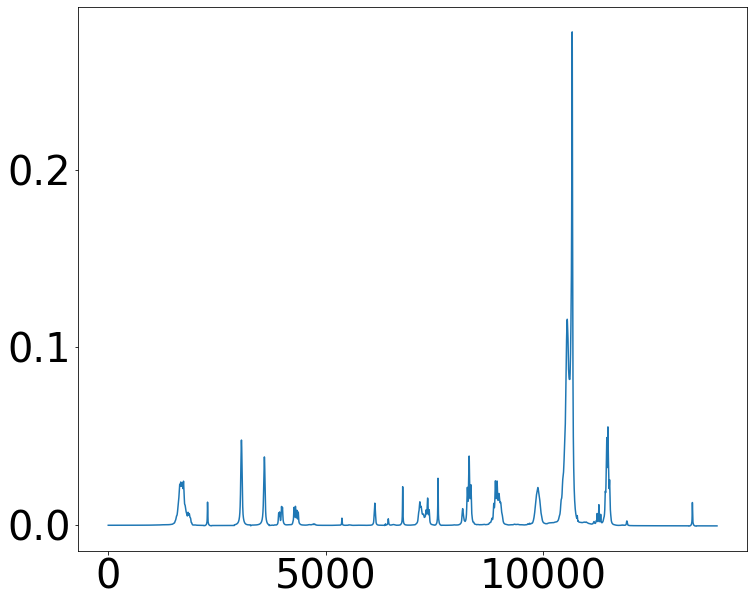

In [286]:
plt.plot(test_t_All[0])

In [287]:
ypred = model.predict((test_t_All))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()

rmse = np.sqrt(((ypred - TestLipProfiles) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))

1/1 [==============================] - 0s 42ms/step
Tg 0.75
TC 0.33
TPL 0.26
TFA 2.5
PUFA 0.51
MUFA 1.09
SFA 1.32
Om3 0.18
Om6 0.45
Om9 1.14
LA 0.69
DHA 0.16
PC 0.61
PE 0.55
FC 0.36
EC 0.55
LPC 0.37
SM 0.14
Overall RMSE:  0.664


In [288]:
ypred = model.predict((test_t_All))

rmse = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all = []

for i in np.arange(18):
    print(LipList5[i],rmse[i].round(2))
    rmse_all.append(rmse[i])
    
print("Overall RMSE: ",np.array(rmse_all).mean().round(3))

1/1 [==============================] - 0s 20ms/step
Tg 0.01
TC 0.02
TPL 0.01
TFA 0.01
PUFA 0.01
MUFA 0.01
SFA 0.01
Om3 0.01
Om6 0.01
Om9 0.01
LA 0.01
DHA 0.01
PC 0.05
PE 0.07
FC 0.04
EC 0.05
LPC 0.18
SM 0.05
Overall RMSE:  0.031


## Use network on NGR hepatic lipids

In [331]:
## Load Liver Data

os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFT_Phase_Refdeconv_IFFT")


testFiles = ['NGR_Liver_Lipids_1__proton-1-3.fid', 'NGR_Liver_Lipid_2_PROTON-1-3.fid', 'NGR_Liver_Lipids_3__proton-1-3.fid', 'NGR_Liver_Lipid_4_second__proton-1-3.fid','NGR_Liver_Lipid_5__PROTON-4-3.fid', 'NGR_Liver_Lipids_17__proton-1-3.fid','NGR_Liver_Lipids_18_PROTON-1-3.fid','NGR_Liver_Lipid_19_PROTON-1-3.fid','NGR_Liver_Lipid_21_second_half__proton-1-3.fid','NGR_Liver_Lipids_22_proton-1-3.fid','NGR_Liver_Lipids_23_PROTON-1-3.fid','NGR_Liver_Lipid_24_4th_half__proton-1-3.fid','NGR_Liver_25_Lipids___proton-1-3.fid','NGR_Liver_Lipids_36_PROTON-1-3.fid','NGR_Liver_Lipids_37_PROTON-2-3.fid','NGR_Liver_Lipids_39__proton-1-3.fid']
        
testFlist = []
for i in testFiles:
    testFlist.append(i[4:19])
    
testFlist = testFlist[:32]

LiverDic = []
LiverData = []
for i in range(len(testFlist)):
    globals()[testFlist[i]+ '_' + 'Dic'],globals()[testFlist[i]+ '_' + 'Data'] = ng.pipe.read(testFiles[i])
    LiverDic.append(globals()[testFlist[i]+ '_' + 'Dic'])
    LiverData.append(globals()[testFlist[i]+ '_' + 'Data'])
    
    
for i in np.arange(16):
    LiverDic[i],LiverData[i] = ng.process.pipe_proc.em(LiverDic[i],LiverData[i],0.2)
    
for i in np.arange(16):
    LiverDic[i],LiverData[i] = ng.process.pipe_proc.ft(LiverDic[i],LiverData[i])
    
#for i in np.arange(16):
    LiverData[i] = LiverData[i].real
    
for i in np.arange(16):
    LiverData[i] = np.reshape(LiverData[i], (32768,1))
    
#for i in np.arange(16):
#    LiverData[i] = LiverData[i]/OvMax
    
    
os.chdir("/home/htjhnson/Downloads/DL_NMR")
LiverCRAFT1 = pd.read_excel('Liver_AdLib_AllData_half_reodered_adj.xlsx', index_col=0)
LipListCRAFT = ['Tg','TC','TFA','PUFA','MUFA','SFA','UFA','Om3','LA','PC','PE','SM','PUFAp','MUFAp','SFAp']

LiverData = np.array(LiverData)[:,14000:28000]
LiverData = LiverData/OvMax

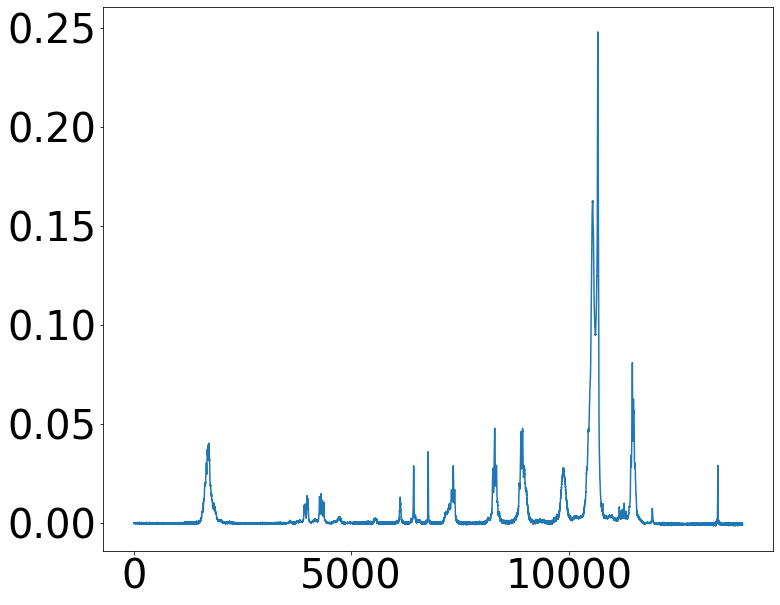

In [332]:
plt.plot(LiverData[0])

In [380]:
ypred1 = model.predict(np.squeeze(LiverData))

# Un-scale the data
for i in np.arange(18):
    ypred1[:,i]  = ypred1[:,i]*conc[:,i].max()


ypred1[8] = ypred1[8]*2
ypred1[10] = ypred1[10]*2
ypred1[11] = ypred1[11]*2

UFA = []
PUFAp = []
MUFAp = []
SFAp = []
for i in np.arange(len(ypred1)):
    u = ypred1[i][3] - ypred1[i][6]
    pp = ypred1[i][4]/ypred1[i][3]
    mp = ypred1[i][5]/ypred1[i][3]
    sp = ypred1[i][6]/ypred1[i][3]
    PUFAp.append(pp*100)
    UFA.append(u)
    SFAp.append(sp*100)
    MUFAp.append(mp*100)
    #ypred1[i] = np.insert(ypred1[i],7,r)

    
ypred1 = np.insert(ypred1,7,UFA,axis=1)
ypred1 = np.insert(ypred1,19,PUFAp,axis=1)
ypred1 = np.insert(ypred1,20,MUFAp,axis=1)
ypred1 = np.insert(ypred1,21,SFAp,axis=1)

    
# convert to dataframe
df = pd.DataFrame(ypred1)
 
# save as a csv file
df.to_csv("HepaticConcentrationsNGR_MLP_FftPhaRefBas_LinearCombinations_AddShiftsNoiseBroad._ThenBaseshift_ThenBroad_TwoEach_InterferencesMore_OutputScaled.csv")

1/1 [==============================] - 0s 17ms/step


In [381]:
df

0          1         2           3           4           5   \
0    23.497469   4.262028  5.926276   87.840057   48.692776   16.252329   
1    16.053392   6.767965  6.161990   67.203346   28.042803   17.122429   
2    48.927155   8.837392  4.530667  165.004898   58.096107   49.983170   
3    64.257515   7.462140  4.694712  209.533936   88.260086   58.377605   
4    40.169739   6.606250  5.555065  137.900391   51.882874   42.309628   
5    11.073303   2.825324  5.856573   48.739616   27.085257    7.057554   
6     8.929449   2.514135  6.257545   42.778076   22.909561    5.556469   
7    11.844607   2.108330  4.908803   48.009758   22.662539   10.391762   
8   105.457787   6.182855  2.070391  328.064026  121.631569  113.602768   
9    73.542656   4.640256  6.805444  240.435837   89.344391   78.200150   
10   72.211937   3.301190  4.358741  229.599976   88.069626   73.072830   
11  106.741814  11.183984  2.229366  336.492737  132.937927  111.215561   
12   67.594666   5.273117  5.544532  219.811218   82.870522   72.027336   
13   41.480511   5.153022  7.363729  144.641754   78.922188   27.472645   
14   31.158909   2.973166  6.549819  109.573921   56.403606   21.594830   
15   57.319111   6.073240  5.880924  190.439301  105.285324   40.547909   

           6           7         8           9   ...        12        13  \
0   22.538363   65.301697  2.431599   46.283676  ...  1.953751  3.451370   
1   21.847054   45.356293  2.161221   25.893232  ...  2.180915  3.806884   
2   57.502037  107.502861  1.955939   55.855614  ...  2.259235  2.309713   
3   63.599953  145.933990  4.442836   83.419785  ...  4.584157  2.457858   
4   43.858921   94.041473  1.542291   50.169991  ...  1.751194  3.088094   
5   14.262197   34.477421  1.774057   25.354452  ...  1.520967  3.553524   
6   13.948539   28.829536  1.872063   21.088627  ...  1.644754  3.768558   
7   14.674689   33.335068  1.103345   21.570772  ...  1.085422  3.042965   
8   93.802994  234.261032  4.414629  116.541229  ...  4.776808  0.494123   
9   73.674095  166.761749  4.549321   84.454819  ...  4.839940  3.870517   
10  68.726936  160.873047  3.382896   84.357216  ...  3.591824  2.055702   
11  93.319710  243.173035  4.298925  128.046341  ...  4.789568  0.703223   
12  65.606850  154.204376  3.224652   79.161545  ...  3.435599  2.859577   
13  38.205032  106.436722  4.580639   74.272545  ...  4.268004  4.301330   
14  31.322624   78.251297  4.285069   52.133137  ...  3.919029  4.228197   
15  44.711227  145.728073  5.221562   99.914833  ...  4.729467  3.501545   

          14        15        16        17        18         19         20  \
0   1.957130  1.327467  2.950669  0.135677  0.477078  55.433453  18.502184   
1   1.992499  0.970700  5.791956  0.080529  0.346762  41.728283  25.478537   
2   1.606891  1.443869  7.300685  0.306185  0.406889  35.208717  30.291929   
3   1.581913  1.570753  5.798373  0.329398  0.415937  42.122097  27.860693   
4   1.969378  1.337502  5.233491  0.111204  0.474417  37.623440  30.681297   
5   1.898298  0.955713  1.893994  0.146487  0.342305  55.571335  14.480117   
6   2.132607  0.953699  1.592836  0.029018  0.382197  53.554447  12.989059   
7   1.565992  0.740372  1.386300  0.049144  0.318933  47.204025  21.645103   
8   0.754019  1.450906  4.537763  0.558461  0.349553  37.075558  34.628231   
9   2.188660  1.565897  3.004102  0.294600  0.521824  37.159348  32.524334   
10  1.521477  1.068027  2.192166  0.396981  0.504652  38.357853  31.826151   
11  0.818011  1.877045  9.065269  0.505164  0.307396  39.506924  33.051403   
12  1.719654  1.711850  3.480875  0.490012  0.542482  37.700768  32.767818   
13  2.340840  1.285620  3.892430  0.267070  0.589805  54.563904  18.993578   
14  1.876036  0.939663  2.081228  0.119857  0.428735  51.475395  19.708002   
15  1.835610  1.793170  4.257200  0.163212  0.519015  55.285500  21.291777   

           21  
0   25.658411  
1   32.508877  
2   34.848682  
3   30.353058  
4   31.804785  
5   29.262022  
6   

## Perform and plot linear regression for both MLP and CRAFT quantification of lipids

In [372]:
##
os.chdir("/home/htjhnson/Downloads/DL_NMR")
TestLipProfiles2 = pd.read_excel('DL_LipMix_LipidProfiles.xlsx', index_col=0)
TestLipProfiles3 = pd.read_excel('DL_LipMix_LipidProfiles_More.xlsx', index_col=0)
TestLipProfiles2_CRAFT = pd.read_excel('DL_LipMix_LipidProfiles_ByCRAFT.xlsx', index_col=0)
TestLipProfiles2_deconv = pd.read_excel('DL_LipMix_LipidProfiles_ByDeconv.xlsx', index_col=0)



#
TestLipProfiles2 = np.array(TestLipProfiles2)
TestLipProfiles3 = np.array(TestLipProfiles3)
TestLipProfiles2_CRAFT = np.array(TestLipProfiles2_CRAFT)
TestLipProfiles2_deconv = np.array(TestLipProfiles2_deconv)
#

LipListn = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC']
LipListCRAFT2 = ['Tg','TC','TFA','PUFA','MUFA','SFA','Om3','LA','DHA','PC','PE']
#LipList5 = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC','LPC',"SM"]


#############################
Methods = []
for i in np.arange(11*16):
    Methods.append('MLP')
    
for i in np.arange(11*11):
    Methods.append('CRAFT')
    
for i in np.arange(11*16):
    Methods.append('Weight')
    
    

###########################
LipGroups = []
for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(16):
            LipGroups.append(LipList5[iii])
            
for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(11):
            LipGroups.append(LipListCRAFT2[iii])
            
for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(16):
            LipGroups.append(LipList5[iii])
              


In [373]:
#ypred3 = model.predict(np.squeeze(test_sc))
ypred3 = model.predict(test)

for i in np.arange(18):
    ypred3[:,i]  = ypred3[:,i]*conc[:,i].max()

ypred4 = []
for i in np.arange(1):
    count = -1
    for ii in np.arange(11):
        count += 1
        c2 = -1
        for iii in np.arange(16):
            c2 += 1
            ypred4.append(ypred3[count][c2])
            
            
TestLipProfiles4 = TestLipProfiles3.copy()
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,7,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,17,1)
TestLipProfiles4 = np.delete(TestLipProfiles4,16,1)


TestLipProfiles3_CRAFT = TestLipProfiles2_CRAFT.copy()
TestLipProfiles3_CRAFT = np.delete(TestLipProfiles3_CRAFT,2,axis=1)
TestLipProfiles3_CRAFT = np.delete(TestLipProfiles3_CRAFT,7,axis=1)
TestLipProfiles3_CRAFT = np.delete(TestLipProfiles3_CRAFT,7,axis=1)

for i in np.arange(1):
    for ii in np.arange(11):
        for iii in np.arange(11):
            count += 1
            ypred4.append(TestLipProfiles3_CRAFT[ii][iii])

LipidProfiles = []
for i in np.arange(1):
    count = -1
    for ii in np.arange(11):
        count += 1
        c2 = -1
        for iii in np.arange(16):
            c2 += 1
            ypred4.append(TestLipProfiles4[count][c2])
    

1/1 [==============================] - 0s 17ms/step


In [374]:
data = {"Method": Methods,
        'Lipid': LipGroups,
        'Concentration': ypred4}

MLPandCRAFT = pd.DataFrame(data)

In [375]:
ypred_n

array([[ 93201.46 , 106139.75 ],
       [ 86028.09 ,  94103.016],
       [ 37677.934,  54427.76 ]], dtype=float32)

In [376]:
TestLipProfilesn

LPC        SM
DL_LipMixture1  1.983839  1.270581
DL_LipMixture2  1.322559  0.847054
DL_LipMixture3  0.661280  0.423527

In [340]:
os.chdir("/home/htjhnson/Downloads")
from sklearn.linear_model import LinearRegression
from scipy import stats

In [341]:
for i in np.arange(16):
    y = np.array(list(ypred3.T[i]))
    x = np.array(list(np.array(TestLipProfiles4).T[i])).reshape((-1,1))
    model = LinearRegression()
    model.fit(x,y)
    #p = model.p(x,y)
    r_sq = model.score(x,y)
    lm = LinearRegression()
    lm.fit(x,y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(x)
    new_X = np.append(np.ones((len(x),1)), x, axis=1)
    M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
    v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
    s_b = np.sqrt(v_b)
    t_b = params/ s_b
    p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
    p_val = np.round(p_val,5)
    p_val
    print(LipList5[i])
    print(f"coefficient of determination: {r_sq.round(3)}")
    print(f"slope: {model.coef_.round(3)}")
    print(p_val[1])

Tg
coefficient of determination: 0.996
slope: [93748.647]
0.0
TC
coefficient of determination: 0.995
slope: [98352.051]
0.0
TPL
coefficient of determination: 0.995
slope: [92105.765]
0.0
TFA
coefficient of determination: 0.997
slope: [97177.265]
0.0
PUFA
coefficient of determination: 0.997
slope: [93725.005]
0.0
MUFA
coefficient of determination: 0.995
slope: [97723.497]
0.0
SFA
coefficient of determination: 0.997
slope: [102388.693]
0.0
Om3
coefficient of determination: 0.997
slope: [95596.24]
0.0
Om6
coefficient of determination: 0.999
slope: [93942.169]
0.0
Om9
coefficient of determination: 0.995
slope: [96420.577]
0.0
LA
coefficient of determination: 0.998
slope: [92043.54]
0.0
DHA
coefficient of determination: 0.994
slope: [96226.611]
0.0
PC
coefficient of determination: 0.8
slope: [90492.31]
0.0002
PE
coefficient of determination: 0.84
slope: [66287.572]
7e-05
FC
coefficient of determination: 0.967
slope: [92502.049]
0.0
EC
coefficient of determination: 0.925
slope: [89587.127]
0

In [342]:
plt.rcParams.update({'font.size': 20})

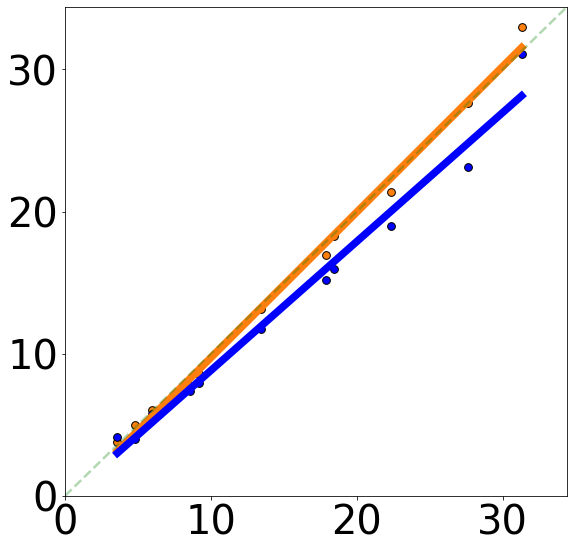

In [440]:
Tg = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Tg']
TgC = Tg.loc[Tg['Method'] == 'CRAFT']
TgM = Tg.loc[Tg['Method'] == 'MLP']
TgW = Tg.loc[Tg['Method'] == 'Weight']

TgWeight = list(TgW["Concentration"])
TgCRAFT = list(TgC["Concentration"])
TgMLP = list(TgM["Concentration"])



# 
x = TgWeight
y = TgMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = TgCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5)


xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.savefig('Tg.png')

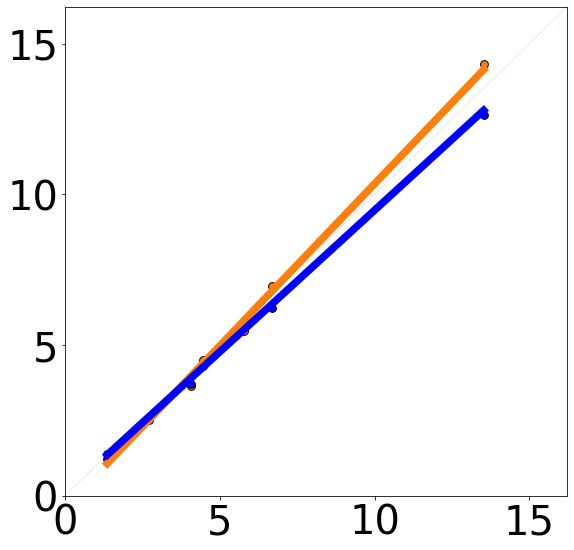

In [441]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'TC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.2)
ax.set_ylim(ymin=0, ymax=max(x)*1.2)

plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 

plt.savefig('TC.png')

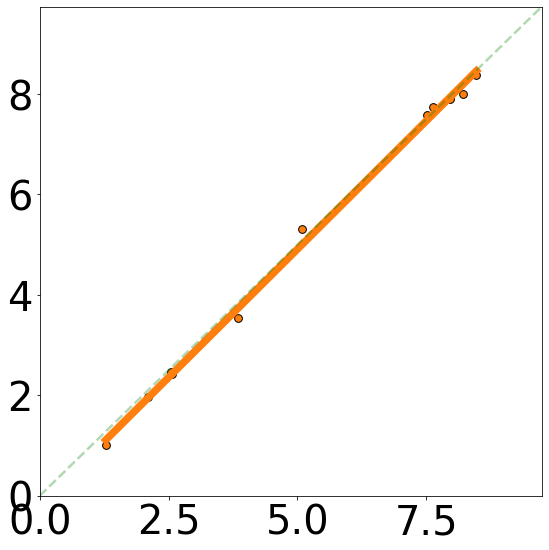

In [442]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'TPL']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])




# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')

ax.set_xlim(xmin=0, xmax=max(x)*1.15)
ax.set_ylim(ymin=0, ymax=max(x)*1.15)


plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.savefig('TPL.png')

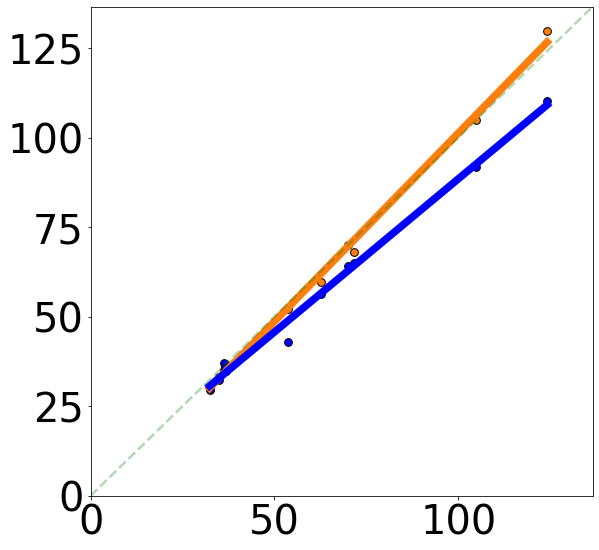

In [443]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'TFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('TFA.png')

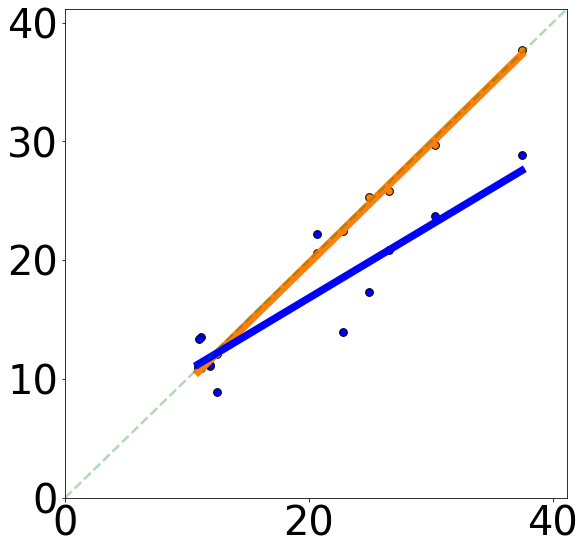

In [444]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'PUFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])




# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('PUFA.png')

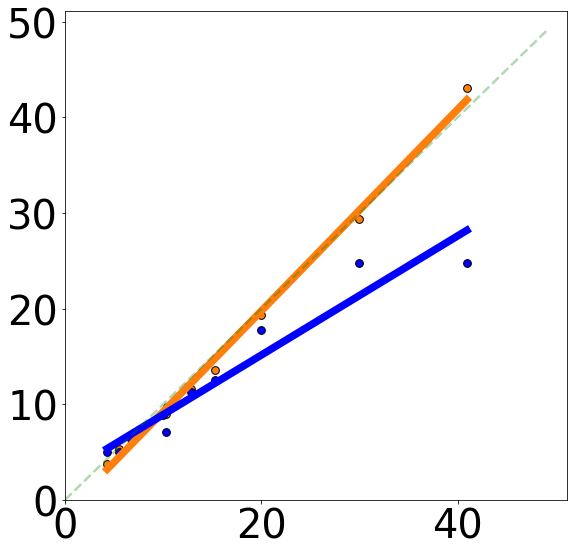

In [445]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'MUFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])




# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.25)
ax.set_ylim(ymin=0, ymax=max(x)*1.25)

plt.savefig('MUFA.png')

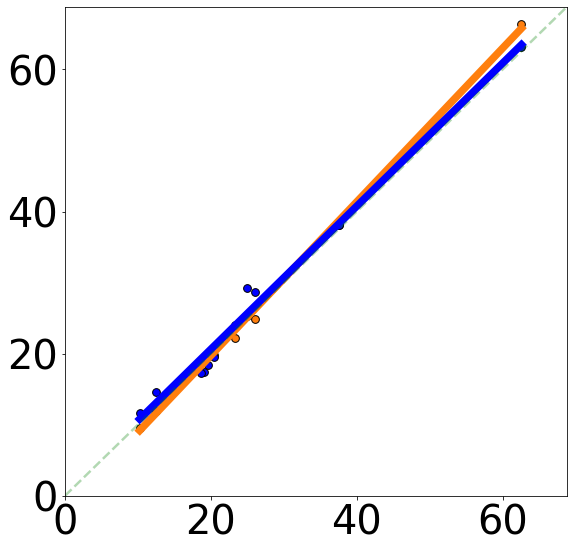

In [446]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'SFA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('SFA.png')

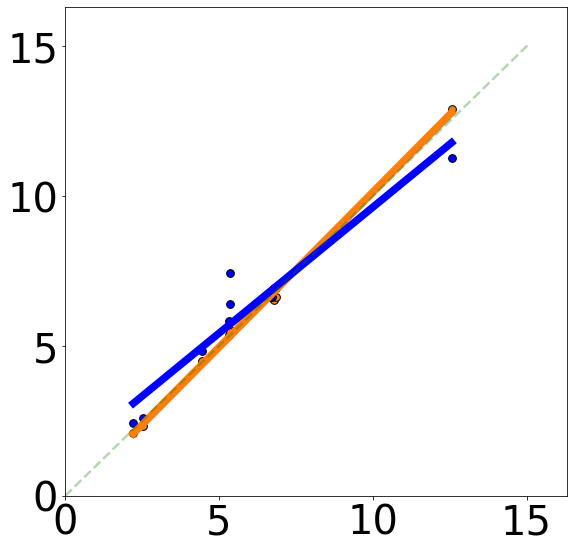

In [447]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Om3']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.3)
ax.set_ylim(ymin=0, ymax=max(x)*1.3)

plt.savefig('Om3.png')

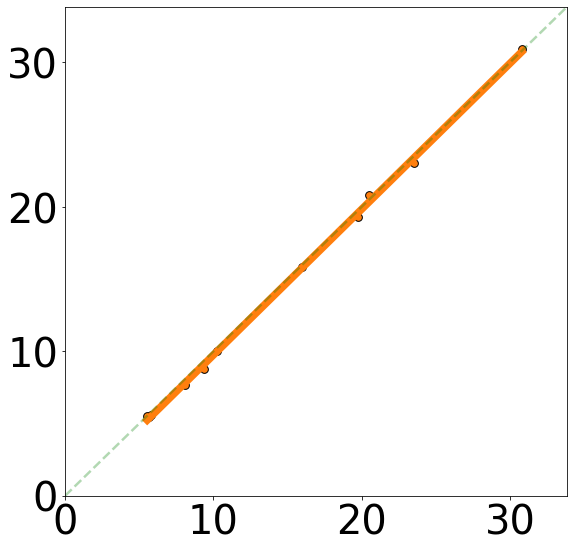

In [448]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Om6']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('Om6.png')

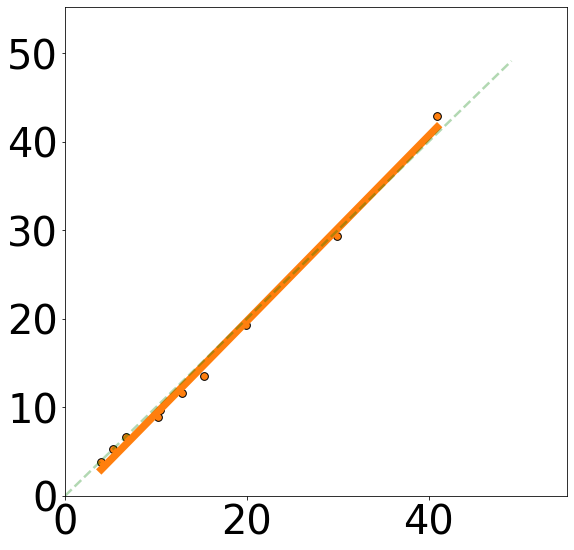

In [449]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'Om9']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.35)
ax.set_ylim(ymin=0, ymax=max(x)*1.35)

plt.savefig('Om9.png')

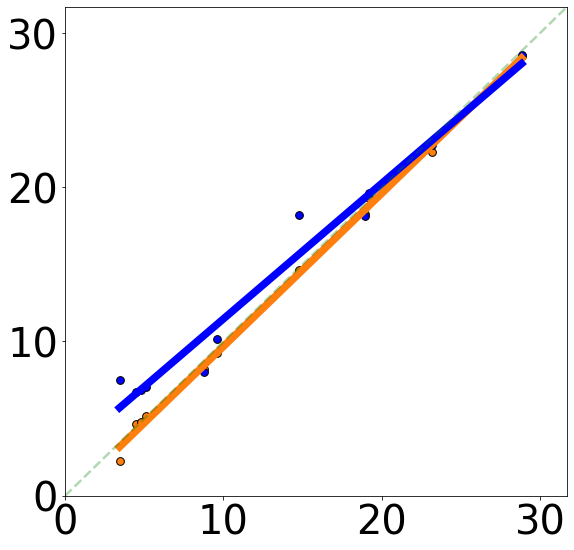

In [450]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'LA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('LA.png')

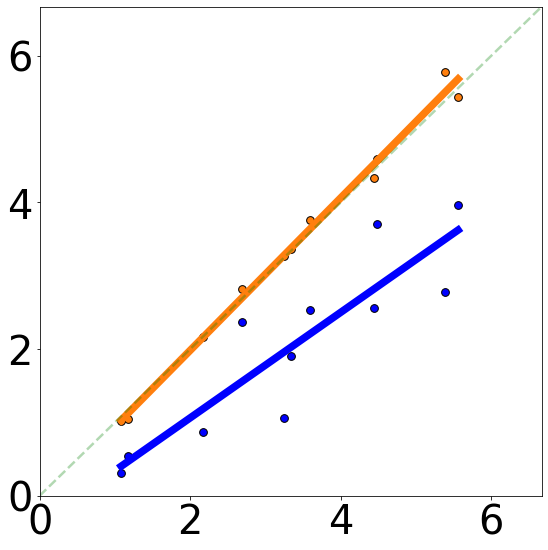

In [451]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'DHA']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.2)
ax.set_ylim(ymin=0, ymax=max(x)*1.2)

plt.savefig('DHA.png')

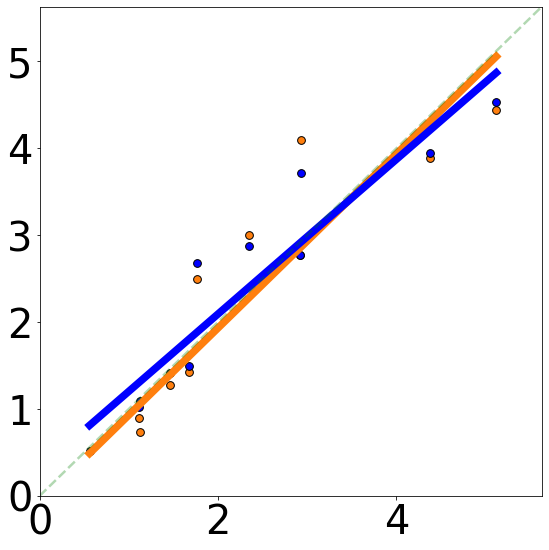

In [452]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'PC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('PC.png')

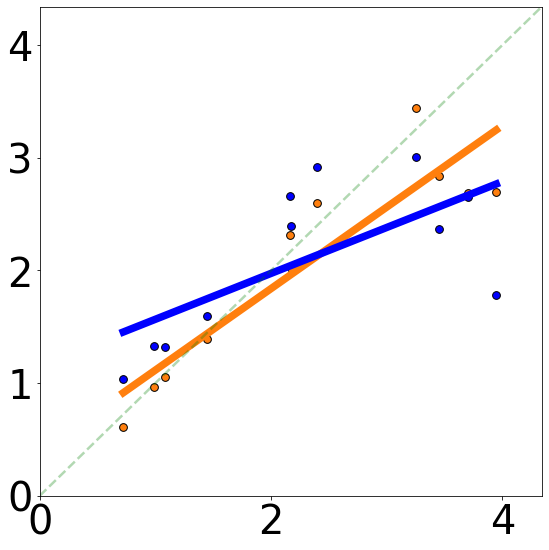

In [453]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'PE']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('PE.png')

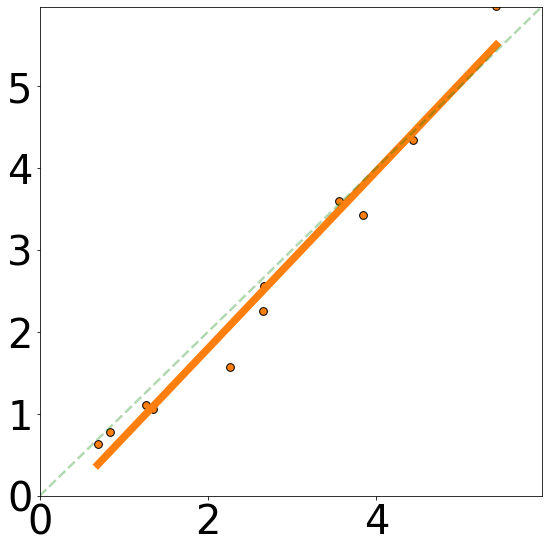

In [454]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'FC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('FC.png')

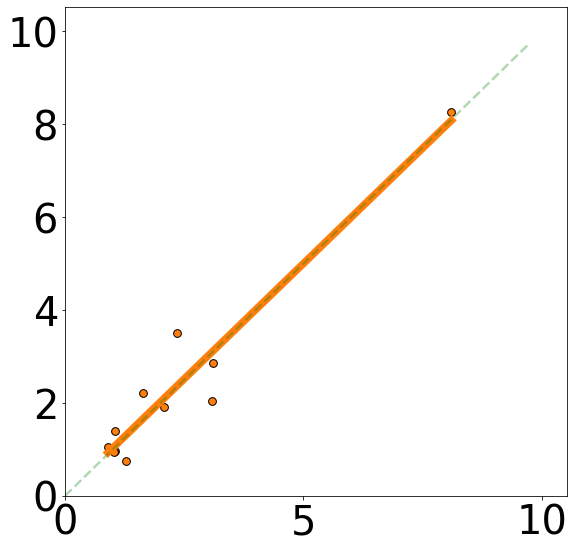

In [455]:
Lipid = MLPandCRAFT.loc[MLPandCRAFT['Lipid'] == 'EC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.3)
ax.set_ylim(ymin=0, ymax=max(x)*1.3)

plt.savefig('EC.png')

In [403]:
os.chdir("/home/htjhnson/Downloads/DL_NMR")

ypred_n = ypred3[8:,-2:]

TestLipProfilesn = pd.read_excel('DL_LipMix_LipidProfiles_SMandLPC.xlsx', index_col=0)
TestLipProfilesn_CRAFT = pd.read_excel('DL_LipMix_LipidProfiles_ByCRAFT_SMandLPC.xlsx', index_col=0)


TestLipProfiles6 = []
for i in np.arange(2):
    count = -1
    for ii in np.arange(3):
        count += 1
        c2 = -1
        for iii in np.arange(2):
            c2 += 1
            TestLipProfiles6.append(np.array(TestLipProfilesn)[count][c2])

################################
Conc = []

for i in np.arange(1):
    count = -1
    for ii in np.arange(3):
        count += 1
        for iii in np.arange(2):
            Conc.append(ypred_n[count][iii])
            
for i in np.arange(1):
    count = -1
    for ii in np.arange(3):
        count += 1
        for iii in np.arange(2):
            Conc.append(np.array(TestLipProfilesn_CRAFT)[count][iii])
            
for i in np.arange(1):
    for ii in np.arange(3):
        for iii in np.arange(2):
            Conc.append(np.array(TestLipProfilesn)[ii][iii])

#LipGroupsn = []
LipListn = ['LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM",'LPC',"SM"] 
#for i in np.arange(1):
#    for ii in np.arange(3):
#        for iii in np.arange(2):
#            count += 1
#            LipGroupsn.append(LipListn[iii])
            
            
Methodsn = ["MLP","MLP","MLP","MLP","MLP","MLP","CRAFT","CRAFT","CRAFT","CRAFT","CRAFT","CRAFT","Weight","Weight","Weight","Weight","Weight","Weight"]
            
data = {"Method": Methodsn,
        'Lipid': LipListn,
        'Concentration': Conc}
MLPandCRAFTn = pd.DataFrame(data)

In [404]:
for i in np.arange(2):
    y = np.array(list(ypred_n.T[i]))
    x = np.array(list(np.array(TestLipProfilesn).T[i])).reshape((-1,1))
    model = LinearRegression()
    model.fit(x,y)
    #p = model.p(x,y)
    r_sq = model.score(x,y)
    lm = LinearRegression()
    lm.fit(x,y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(x)
    new_X = np.append(np.ones((len(x),1)), x, axis=1)
    M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
    v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
    s_b = np.sqrt(v_b)
    t_b = params/ s_b
    p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
    p_val = np.round(p_val,3)
    p_val
    print(LipListn[i])
    print(f"coefficient of determination: {r_sq.round(3)}")
    print(f"slope: {model.coef_.round(3)}")
    print(p_val[1])

LPC
coefficient of determination: 0.934
slope: [0.625]
0.165
SM
coefficient of determination: 0.999
slope: [1.294]
0.016


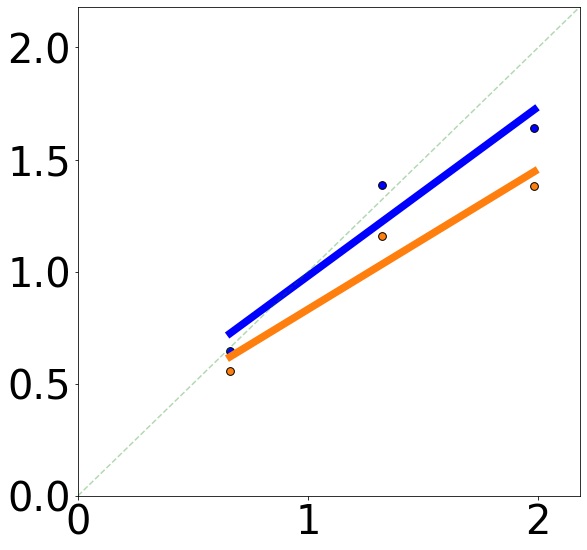

In [456]:
Lipid = MLPandCRAFTn.loc[MLPandCRAFTn['Lipid'] == 'LPC']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=3)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=3)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=1.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.1)
ax.set_ylim(ymin=0, ymax=max(x)*1.1)

plt.savefig('LPC.png')

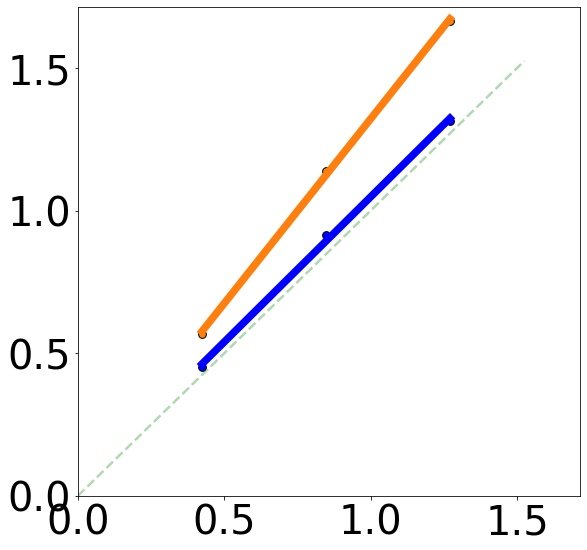

In [457]:
Lipid = MLPandCRAFTn.loc[MLPandCRAFTn['Lipid'] == 'SM']
C = Lipid.loc[Lipid['Method'] == 'CRAFT']
M = Lipid.loc[Lipid['Method'] == 'MLP']
W = Lipid.loc[Lipid['Method'] == 'Weight']

LipidByWeight = list(W["Concentration"])
LipidByCRAFT = list(C["Concentration"])
LipidByMLP = list(M["Concentration"])



# 
x = LipidByWeight
y = LipidByMLP
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))
# Add scatterplot
ax.scatter(x, y, s=60,c='tab:orange', edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="tab:orange", lw=7.5);


# Generate data
y2 = LipidByCRAFT
# Initialize layout
# Add scatterplot
ax.scatter(x, y2, s=60, c="b", edgecolors="k")
# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y2, deg=1)
# Create sequence of 100 numbers from 0 to 10 
xseq = np.linspace(min(x), max(x), num=11)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="b", lw=7.5);

xseq2 = np.linspace(min(x)*0, max(x)*1.2, num=11)
ax.plot(xseq2, xseq2, color="g", lw=2.5, alpha=0.3, linestyle='dashed')


ax.set_xlim(xmin=0, xmax=max(x)*1.35)
ax.set_ylim(ymin=0, ymax=max(x)*1.35)

plt.savefig('SM.png')

## LoD determination by reducing lipid concentrations until percent error is above 5%

In [ ]:
## Test how low concentration can go before Tg is over 5% inaccurate?

In [763]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')
dic37,data37 = ng.pipe.read('DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid')


## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data5 = data5 - data1
data9 = data9 - data1
data11 = data11 - data1
data13 = data13 - data1
data15 = data15 - data1
data18 = data18 - data1
data20 = data20 - data1
data24 = data24 - data1
data27 = data27 - data1
data28 = data28 - data1
data30 = data30 - data1
data33 = data33 - data1
data35 = data35 - data1
data37 = data37 - data1


## Scale one of each lipid reference standard to 10 mM of a total fatty acids (or cholesterol)
data1 = data1
n = 0.6
# Trlinolein
data2 = data2*0.372446*n
# DipalmitoylPE
data5 = data5*0.506418*0.5
# TriDHA
data9 = data9*0.792461*n
# DipalmitoylPC
data11 = data11*0.642029*0.5
# EPAm
data13 = data13*0.732107*0.5
# Sphingomyelin
data15 = data15*0.88941*0.5
# Triolein
data18 = data18*0.458689*n
# LPC
data20 = data20*6.52145*0.5
# Tripalmitin
data24 = data24*0.580395*n
# CholArachindonate
data27 = data27*1.58731*0.5
# DimyristoylPE
data28 = data28*0.785295*0.5
# CholLinoleate
data30 = data30*1.024463*0.5
# Cholesterol
data33 = data33*1.005112*0.5
# DioleoylPC
data35 = data35*0.700671*0.5
# Palmitic Acid
data37 = data37*1.01731*0.5



datap2 = dataprof2*0.372446*n
datap5 = dataprof5*0.506418*0.5
datap9 = dataprof9*0.792461*n
datap11 = dataprof11*0.642029*0.5
datap13 = dataprof13*0.732107*0.5
datap15 = dataprof15*0.88941*0.5
datap18 = dataprof18*0.458689*n
datap20 = dataprof20*6.52145*0.5
datap24 = dataprof24*0.580395*n
datap27 = dataprof27*1.58731*0.5
datap28 = dataprof28*0.785295*0.5
datap30 = dataprof30*1.024463*0.5
datap33 = dataprof33*1.005112*0.5
datap35 = dataprof35*0.700671*0.5
datap37 = dataprof37*1.01731*0.5


TestSpec = (data2+data5+data9+data11+data13+data15+data18+data20+data24+data27+data28+data30+data33+data35+data37+data1)


_dic1,TestSpec = ng.process.pipe_proc.em(dic1,TestSpec,lb=0)
_dic1,TestSpec = ng.process.pipe_proc.ft(_dic1,TestSpec)

##
TestSpec = TestSpec[14000:28000]/OvMax
profile = (datap2+datap5+datap9+datap11+datap13+datap15+datap18+datap20+datap24+datap27+datap28+datap30+datap33+datap35+datap37)
TestSpec = np.reshape(TestSpec,[1,14000])
TestSpec = np.array(TestSpec)

## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)





## Test model and print percent error
ypred = model.predict((TestSpec))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    


i = 0
print(ypred[0][i])
print(profile[i])

PE = (abs(ypred - profile)/profile)*100
print(LipList5[i],"Percent Error:",PE[0][i])


## Run model again for scaled RMSE
ypred = model.predict((TestSpec))
profile = profile/conc[:,i].max()

rmse = np.sqrt(((ypred[0] - profile) ** 2).mean(axis=0))
print("RMSE:",rmse)

1/1 [==============================] - 0s 17ms/step
8.412411
8.000001017143074
Tg Percent Error: 5.155120831324451
1/1 [==============================] - 0s 15ms/step
RMSE: 0.5658345454695115


In [764]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')
dic37,data37 = ng.pipe.read('DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid')


## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data5 = data5 - data1
data9 = data9 - data1
data11 = data11 - data1
data13 = data13 - data1
data15 = data15 - data1
data18 = data18 - data1
data20 = data20 - data1
data24 = data24 - data1
data27 = data27 - data1
data28 = data28 - data1
data30 = data30 - data1
data33 = data33 - data1
data35 = data35 - data1
data37 = data37 - data1


## Scale one of each lipid reference standard to 10 mM of a total fatty acids (or cholesterol)
data1 = data1
n = 0.064
# Trlinolein
data2 = data2*0.372446*0.5
# DipalmitoylPE
data5 = data5*0.506418*0.5
# TriDHA
data9 = data9*0.792461*0.5
# DipalmitoylPC
data11 = data11*0.642029*0.5
# EPAm
data13 = data13*0.732107*0.5
# Sphingomyelin
data15 = data15*0.88941*0.5
# Triolein
data18 = data18*0.458689*0.5
# LPC
data20 = data20*6.52145*0.5
# Tripalmitin
data24 = data24*0.580395*0.5
# CholArachindonate
data27 = data27*1.58731*n
# DimyristoylPE
data28 = data28*0.785295*0.5
# CholLinoleate
data30 = data30*1.024463*n
# Cholesterol
data33 = data33*1.005112*n
# DioleoylPC
data35 = data35*0.700671*0.5
# Palmitic Acid
data37 = data37*1.01731*0.5



datap2 = dataprof2*0.372446*0.5
datap5 = dataprof5*0.506418*0.5
datap9 = dataprof9*0.792461*0.5
datap11 = dataprof11*0.642029*0.5
datap13 = dataprof13*0.732107*0.5
datap15 = dataprof15*0.88941*0.5
datap18 = dataprof18*0.458689*0.5
datap20 = dataprof20*6.52145*0.5
datap24 = dataprof24*0.580395*0.5
datap27 = dataprof27*1.58731*n
datap28 = dataprof28*0.785295*0.5
datap30 = dataprof30*1.024463*n
datap33 = dataprof33*1.005112*n
datap35 = dataprof35*0.700671*0.5
datap37 = dataprof37*1.01731*0.5


TestSpec = (data2+data5+data9+data11+data13+data15+data18+data20+data24+data27+data28+data30+data33+data35+data37+data1)


_dic1,TestSpec = ng.process.pipe_proc.em(dic1,TestSpec,lb=0)
_dic1,TestSpec = ng.process.pipe_proc.ft(_dic1,TestSpec)

##
TestSpec = TestSpec[14000:28000]/OvMax
profile = (datap2+datap5+datap9+datap11+datap13+datap15+datap18+datap20+datap24+datap27+datap28+datap30+datap33+datap35+datap37)
TestSpec = np.reshape(TestSpec,[1,14000])
TestSpec = np.array(TestSpec)

## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)





## Test model and print percent error
ypred = model.predict((TestSpec))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    


i = 1
print(ypred[0][i])
print(profile[i])

PE = (abs(ypred - profile)/profile)*100
print(LipList5[i],"Percent Error:",PE[0][i])


## Run model again for scaled RMSE
ypred = model.predict((TestSpec))
profile = profile/conc[:,i].max()

rmse = np.sqrt(((ypred[0] - profile) ** 2).mean(axis=0))
print("RMSE:",rmse)

1/1 [==============================] - 0s 25ms/step
2.01305
1.9199987736229511
TC Percent Error: 4.8464252686562075
1/1 [==============================] - 0s 14ms/step
RMSE: 0.8962659914174742


## SNR determinations, by mean of whole spectra and by height of individual peak/peaks?

In [765]:
## Getting the directory
os.chdir("/home/htjhnson/Downloads/DL_NMR/AfterFirstReview/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT_new")


## loading the data files
dic1,data1 = ng.pipe.read('DL_DMSO2only_2_PROTON-2-3.fid')
dic2,data2 = ng.pipe.read('DL_LipMix5_Trilinolein_10_PROTON-2-3.fid')
dic5,data5 = ng.pipe.read('DL_LipMix2_PE_10_new_PROTON-2-3.fid')
dic9,data9 = ng.pipe.read('DL8_TriDHA_3_PROTON-2-3.fid')
dic11,data11 = ng.pipe.read('DL7_DipalmitoylPC_2_PROTON-2-3.fid')
dic13,data13 = ng.pipe.read('DL8_EPAm_3_PROTON-2-3.fid')
dic15,data15 = ng.pipe.read('DL8_Sphingomyelin_3_PROTON-3-3.fid')
dic18,data18 = ng.pipe.read('DL_LipMix6_Triolein_PROTON-2-3.fid')
dic20,data20 = ng.pipe.read('DL_LipMix5_LPC_1_PROTON-2-3.fid')
dic24,data24 = ng.pipe.read('DL9_Tripalmitin_PROTON-2-3.fid')
dic27,data27 = ng.pipe.read('DL7_CholArachidonate_3_PROTON-2-3.fid')
dic28,data28 = ng.pipe.read('DL7_DimyristoylPE_PROTON-2-3.fid')
dic30,data30 = ng.pipe.read('DL_LipMix6_CholLinoleate_PROTON-2-3.fid')
dic33,data33 = ng.pipe.read('DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid')
dic35,data35 = ng.pipe.read('DL9_DioleoylPC_3_PROTON-2-3.fid')
dic37,data37 = ng.pipe.read('DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid')


## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
data2 = data2 - data1
data5 = data5 - data1
data9 = data9 - data1
data11 = data11 - data1
data13 = data13 - data1
data15 = data15 - data1
data18 = data18 - data1
data20 = data20 - data1
data24 = data24 - data1
data27 = data27 - data1
data28 = data28 - data1
data30 = data30 - data1
data33 = data33 - data1
data35 = data35 - data1
data37 = data37 - data1


## Scale one of each lipid reference standard to 10 mM of a total fatty acids (or cholesterol)
n = 0.5
# Trlinolein
data2 = data2*0.372446*n
# DipalmitoylPE
data5 = data5*0.506418*n
# TriDHA
data9 = data9*0.792461*n
# DipalmitoylPC
data11 = data11*0.642029*n
# EPAm
data13 = data13*0.732107*n
# Sphingomyelin
data15 = data15*0.88941*n
# Triolein
data18 = data18*0.458689*n
# LPC
data20 = data20*6.52145*n
# Tripalmitin
data24 = data24*0.580395*n
# CholArachindonate
data27 = data27*1.58731*n
# DimyristoylPE
data28 = data28*0.785295*n
# CholLinoleate
data30 = data30*1.024463*n
# Cholesterol
data33 = data33*1.005112*n
# DioleoylPC
data35 = data35*0.700671*n
# Palmitic Acid
data37 = data37*1.01731*n



datap2 = dataprof2*0.372446*n
datap5 = dataprof5*0.506418*n
datap9 = dataprof9*0.792461*n
datap11 = dataprof11*0.642029*n
datap13 = dataprof13*0.732107*n
datap15 = dataprof15*0.88941*n
datap18 = dataprof18*0.458689*n
datap20 = dataprof20*6.52145*n
datap24 = dataprof24*0.580395*n
datap27 = dataprof27*1.58731*n
datap28 = dataprof28*0.785295*n
datap30 = dataprof30*1.024463*n
datap33 = dataprof33*1.005112*n
datap35 = dataprof35*0.700671*n
datap37 = dataprof37*1.01731*n


TestSpec = (data2+data5+data9+data11+data13+data15+data18+data20+data24+data27+data28+data30+data33+data35+data37+data1)


_dic1,TestSpec = ng.process.pipe_proc.em(dic1,TestSpec,lb=0)
_dic1,TestSpec = ng.process.pipe_proc.ft(_dic1,TestSpec)

##
TestSpec = TestSpec[14000:28000]/OvMax
profile = (datap2+datap5+datap9+datap11+datap13+datap15+datap18+datap20+datap24+datap27+datap28+datap30+datap33+datap35+datap37)
TestSpec = np.reshape(TestSpec,[1,14000])
TestSpec = np.array(TestSpec).real

## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)
profile = np.delete(profile,7)





# Test model and print percent error
ypred = model.predict((TestSpec))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
    
i = 0
print("Predicted conc.:",ypred[0][i].round(2))
print("Ground truth conc.:",profile[i].round(2))



PE1 = (abs(ypred - profile)/profile)*100
print(LipList5[i],"Percent Error:",PE1[0][i])


## Run model again for scaled RMSE
ypred = model.predict((TestSpec))
profile2 = []
for i in np.arange(18):
    profile2.append(profile[i]/conc[:,i].max())


rmse = np.sqrt(((ypred[0] - profile2) ** 2).mean(axis=0))
print("RMSE:",rmse)

1/1 [==============================] - 0s 15ms/step
Predicted conc.: 7.07
Ground truth conc.: 6.67
Tg Percent Error: 6.09841905123454
1/1 [==============================] - 0s 16ms/step
RMSE: 0.18738772861047095


In [766]:
S_1 = TestSpec[0].mean()
N_1 = np.std(TestSpec[0][:500])
#print(S)
#print(N)
SNR = S_1/N_1
print(S_1/N_1)


221.51085


In [767]:
## Calculate SMR based on peak height. As there is no best peak to select and no indication of what peak the network uses, I tried several methods including picking the signal I would use for CRAFT,
## then averageing the multiplet peak heights and dividing by standard deviation of the first 500 noisy data points. Also tried selecting just the smallest peak in the multiplet of the selected signal.

In [768]:
plt.rcParams["figure.figsize"] = (10,5)

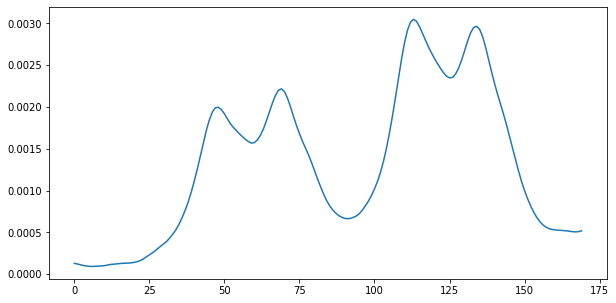

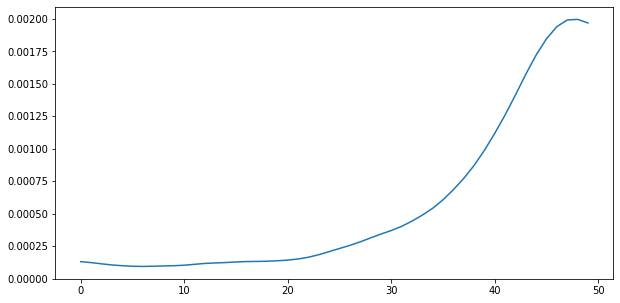

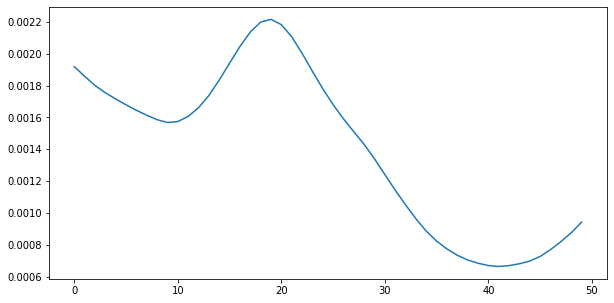

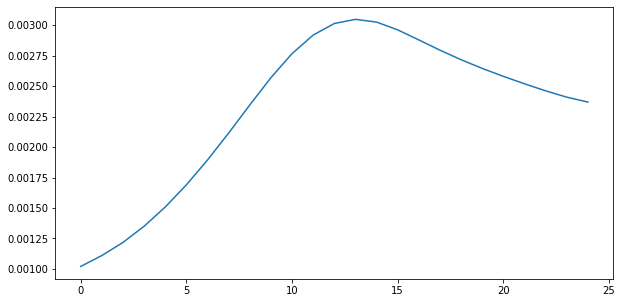

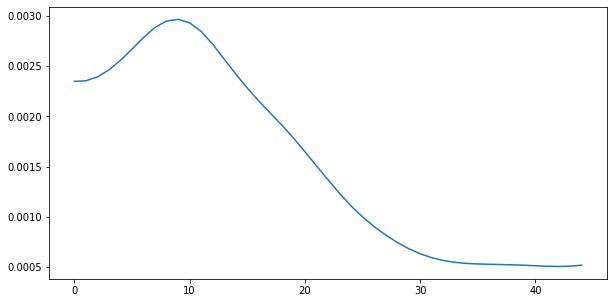

In [769]:
plt.plot(TestSpec[0][3870:4040])
plt.show()
plt.plot(TestSpec[0][3870:3920])
plt.show()
plt.plot(TestSpec[0][3920:3970])
plt.show()
plt.plot(TestSpec[0][3970:3995])
plt.show()
plt.plot(TestSpec[0][3995:4040])
plt.show()

In [770]:
t1 = TestSpec[0][3870:3920].max()
t2 = TestSpec[0][3920:3970].max()
t3 = TestSpec[0][3970:3995].max()
t4 = TestSpec[0][3995:4040].max()

t = (t1+t2+t3+t4)/4
print(t)

0.0025563829112797976


In [771]:
## SNR using peak height average of selected signal of four triglyceride peaks

S = 2.5*t
N = TestSpec[0][:500].max()-TestSpec[0][:500].min()
#print(S)
#print(N)
print(S/N)

53.29866522525007


In [772]:
## SNR using weakest peak height of selected signal for SNR

S = 2.5*t1
#print(S)
#print(N)
print(S/N)

41.61932184326245


In [773]:
Errors = []
for i in np.arange(18):
    Errors.append((abs(ypred[0][i] - profile2[i])/profile2[i])*100)
    print(LipList5[i],"Percent Error:",Errors[i])
print("MAPE:",np.array(Errors).mean())

Tg Percent Error: 6.098414054692916
TC Percent Error: 0.558131608693848
TPL Percent Error: 6.627483694712592
TFA Percent Error: 0.8005141643530732
PUFA Percent Error: 0.990859780797376
MUFA Percent Error: 2.7212350708871744
SFA Percent Error: 0.2650879342200388
Om3 Percent Error: 0.7373738508341465
Om6 Percent Error: 0.4320293905595097
Om9 Percent Error: 4.870833396834294
LA Percent Error: 3.4854910470015583
DHA Percent Error: 3.062943293802342
PC Percent Error: 17.37041011070821
PE Percent Error: 5.369636141202676
FC Percent Error: 2.781736449799592
EC Percent Error: 2.96980609123208
LPC Percent Error: 31.98695173240554
SM Percent Error: 7.085495825754541
MAPE: 5.456357424360639


In [774]:
## Test model and print percent error
np.random.seed(454545)
noise1 = np.random.uniform(low=-0.001,high=0.001,size=14000)
TestSpec1 = TestSpec+noise1

# Test model and print percent error
ypred = model.predict((TestSpec1))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
    
i = 0
print("Predicted conc.:",ypred[0][i].round(2))
print("Ground truth conc.:",profile[i].round(2))



PE1 = (abs(ypred - profile)/profile)*100
print(LipList5[i],"Percent Error:",PE1[0][i])


## Run model again for scaled RMSE
ypred = model.predict((TestSpec1))
profile2 = []
for i in np.arange(18):
    profile2.append(profile[i]/conc[:,i].max())


rmse1 = np.sqrt(((ypred[0] - profile2) ** 2).mean(axis=0))
print("RMSE:",rmse1)

1/1 [==============================] - 0s 14ms/step
Predicted conc.: 7.0
Ground truth conc.: 6.67
Tg Percent Error: 5.0178894988273655
1/1 [==============================] - 0s 17ms/step
RMSE: 0.18802050061790182


In [775]:
t1_1 = TestSpec1[0][3870:3920].max()
t2_1 = TestSpec1[0][3920:3970].max()
t3_1 = TestSpec1[0][3970:3995].max()
t4_1 = TestSpec1[0][3995:4040].max()
t_1 = (t1_1+t2_1+t3_1+t4_1)/4


# SNR using mean of spectra as signal
S1_1 = TestSpec1[0].mean()
N1_1 = np.std(TestSpec1[0][:500])
SNR1 = S1_1/N1_1
print("SNR using spectrum mean",SNR1)


## SNR using peak height average of selected signal of four triglyceride peaks
S = 2.5*t_1
N = TestSpec1[0][:500].max()-TestSpec1[0][:500].min()
print("SNR using peak height averages",S/N)


## SNR using weakest peak height of selected signal for SNR
S = 2.5*t1_1
print("SNR using weakest height",S/N)

SNR using spectrum mean 7.966239647841018
SNR using peak height averages 4.141625807759298
SNR using weakest height 3.3796192129502045


In [776]:
Errors = []
for i in np.arange(18):
    Errors.append((abs(ypred[0][i] - profile2[i])/profile2[i])*100)
    print(LipList5[i],"Percent Error:",Errors[i])
print("MAPE:",np.array(Errors).mean())

Tg Percent Error: 5.01788328458181
TC Percent Error: 0.776595831159852
TPL Percent Error: 7.616638131171663
TFA Percent Error: 1.2711482078122978
PUFA Percent Error: 1.4290004089611372
MUFA Percent Error: 1.3986846304007907
SFA Percent Error: 0.7253527908129231
Om3 Percent Error: 0.4633790053256104
Om6 Percent Error: 1.614764663665259
Om9 Percent Error: 3.0443368530528523
LA Percent Error: 2.3758132023889638
DHA Percent Error: 1.8672557232951956
PC Percent Error: 14.254214202848079
PE Percent Error: 7.534151017488119
FC Percent Error: 2.7024157760831486
EC Percent Error: 3.2012654796707367
LPC Percent Error: 32.1538734152475
SM Percent Error: 3.9964730878055805
MAPE: 5.08018031732064


In [777]:
## Test model and print percent error
np.random.seed(454545)
noise4 = np.random.uniform(low=-0.0001,high=0.0001,size=14000)
TestSpec4 = TestSpec+noise4


# Test model and print percent error
ypred = model.predict((TestSpec4))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
    
i = 0
print("Predicted conc.:",ypred[0][i].round(2))
print("Ground truth conc.:",profile[i].round(2))



PE4 = (abs(ypred - profile)/profile)*100
print(LipList5[i],"Percent Error:",PE4[0][i])


## Run model again for scaled RMSE
ypred = model.predict((TestSpec4))
profile2 = []
for i in np.arange(18):
    profile2.append(profile[i]/conc[:,i].max())


rmse4 = np.sqrt(((ypred[0] - profile2) ** 2).mean(axis=0))
print("RMSE:",rmse4)

1/1 [==============================] - 0s 14ms/step
Predicted conc.: 7.07
Ground truth conc.: 6.67
Tg Percent Error: 5.990515584423913
1/1 [==============================] - 0s 22ms/step
RMSE: 0.1874345339013467


In [778]:
t1_2 = TestSpec4[0][3870:3920].max()
t2_2 = TestSpec4[0][3920:3970].max()
t3_2 = TestSpec4[0][3970:3995].max()
t4_2 = TestSpec4[0][3995:4040].max()
t_2 = (t1_2+t2_2+t3_2+t4_2)/4


# SNR using mean of spectra as signal
S4_1 = TestSpec4[0].mean()
N4_1 = np.std(TestSpec4[0][:500])
SNR4 = S4_1/N4_1
print("SNR using spectrum mean",SNR4)

## SNR using peak height average of selected signal of four triglyceride peaks
S = 2.5*t_2
N = TestSpec4[0][:500].max()-TestSpec4[0][:500].min()
print("SNR using peak height averages",S/N)


## SNR using weakest peak height of selected signal for SNR
S = 2.5*t1_2
print("SNR using weakest height",S/N)

SNR using spectrum mean 74.34197053974106
SNR using peak height averages 24.810261946990483
SNR using weakest height 19.415962060872104


In [779]:
Errors = []
for i in np.arange(18):
    Errors.append((abs(ypred[0][i] - profile2[i])/profile2[i])*100)
    print(LipList5[i],"Percent Error:",Errors[i])
print("MAPE:",np.array(Errors).mean())

Tg Percent Error: 5.990509353818388
TC Percent Error: 0.5800009307541241
TPL Percent Error: 6.726396467927256
TFA Percent Error: 0.8476504383805752
PUFA Percent Error: 1.0346500897168607
MUFA Percent Error: 2.5887428921956106
SFA Percent Error: 0.3110945644733557
Om3 Percent Error: 0.7099431123947689
Om6 Percent Error: 0.5501752158173939
Om9 Percent Error: 4.688076448748859
LA Percent Error: 3.3744610469177037
DHA Percent Error: 2.943432217288744
PC Percent Error: 17.05886346458296
PE Percent Error: 5.5861150911652055
FC Percent Error: 2.773715387937547
EC Percent Error: 2.9929764425936494
LPC Percent Error: 32.0036866115181
SM Percent Error: 6.7765789581932205
MAPE: 5.418726040801351


In [780]:
## Test model and print percent error
np.random.seed(454545)
noise2 = np.random.uniform(low=-0.005,high=0.005,size=14000)
TestSpec2 = TestSpec+noise2


# Test model and print percent error
ypred = model.predict((TestSpec2))

for i in np.arange(18):
    ypred[:,i]  = ypred[:,i]*conc[:,i].max()
    
    
    
i = 0
print("Predicted conc.:",ypred[0][i].round(2))
print("Ground truth conc.:",profile[i].round(2))



PE2 = (abs(ypred - profile)/profile)*100
print(LipList5[i],"Percent Error:",PE2[0][i])


## Run model again for scaled RMSE
ypred = model.predict((TestSpec2))
profile2 = []
for i in np.arange(18):
    profile2.append(profile[i]/conc[:,i].max())


rmse2 = np.sqrt(((ypred[0] - profile2) ** 2).mean(axis=0))
print("RMSE:",rmse2)

1/1 [==============================] - 0s 16ms/step
Predicted conc.: 6.71
Ground truth conc.: 6.67
Tg Percent Error: 0.6948843721971752
1/1 [==============================] - 0s 17ms/step
RMSE: 0.1941716491398628


In [781]:
t1_2 = TestSpec2[0][3870:3920].max()
t2_2 = TestSpec2[0][3920:3970].max()
t3_2 = TestSpec2[0][3970:3995].max()
t4_2 = TestSpec2[0][3995:4040].max()
t_2 = (t1_2+t2_2+t3_2+t4_2)/4


# SNR using mean of spectra as signal
S2_1 = TestSpec2[0].mean()
N2_1 = np.std(TestSpec2[0][:500])
SNR2 = S2_1/N2_1
print("SNR using spectrum mean",SNR2)


## SNR using peak height average of selected signal of four triglyceride peaks
S = 2.5*t_2
N = TestSpec2[0][:500].max()-TestSpec2[0][:500].min()
print("SNR using peak height averages",S/N)


## SNR using weakest peak height of selected signal for SNR
S = 2.5*t1_2
print("SNR using weakest height",S/N)

SNR using spectrum mean 1.5968337792823266
SNR using peak height averages 1.7275603801303971
SNR using weakest height 1.4033060380830837


In [782]:
Errors = []
for i in np.arange(18):
    Errors.append((abs(ypred[0][i] - profile2[i])/profile2[i])*100)
    print(LipList5[i],"Percent Error:",Errors[i])
print("MAPE:",np.array(Errors).mean())

Tg Percent Error: 0.6948830634404647
TC Percent Error: 1.6504450877526426
TPL Percent Error: 11.57327590524226
TFA Percent Error: 3.1538405309668662
PUFA Percent Error: 3.181634183306856
MUFA Percent Error: 3.8910195375399166
SFA Percent Error: 2.566453582613568
Om3 Percent Error: 0.6326875968625544
Om6 Percent Error: 6.346048580390782
Om9 Percent Error: 4.26108175391116
LA Percent Error: 2.0627986310652635
DHA Percent Error: 2.9151499737064612
PC Percent Error: 1.7892627986877958
PE Percent Error: 16.19246620642906
FC Percent Error: 2.3853989089159757
EC Percent Error: 4.126873268552859
LPC Percent Error: 32.82139512750577
SM Percent Error: 8.35979696930547
MAPE: 6.0335839836775405


In [785]:
print("Original Scan - SNR:",SNR.round(2),"RMSE:",rmse.round(3),"MAPE:",PE.mean().round(2))
print("Add Noise - SNR:",SNR4.round(2),"RMSE:",rmse4.round(3),"MAPE:",PE4.mean().round(2))
print("Add More Noise - SNR:",SNR1.round(2),"RMSE:",rmse1.round(3),"MAPE:",PE1.mean().round(2))
print("Even More Noise - SNR:",SNR2.round(2),"RMSE:",rmse2.round(3),"MAPE:",PE2.mean().round(2))
print("____________________________________________________")
print("SNR by spectrum mean over standard deviation of the noise is reported here, although this is not what I see reported in literature. Peak height is generally used, maybe lowest peak height could be used but this might suggest to readers a specific peak is responsible for the MLPs decision. Also confusing is that if the base spectra used here is altered, then SNR/RMSE is altered, especially in cases where relative peak overlap exists. It's possible SNR/RMSE could change simply by switching which scan was used for each lipid reference standard used in data generation. Another observation is that as our lipid concentrations are scaled higher initially, SNR decreases rather than increases - so as expected the absolute concentrations matter as well as relative concentrations for RMSE/SNR (starting with n=0.5 results in much better metrics than n=2). To make the mean spectrum SNR metric individualized by metabolite rather than an overall measure we could define the signal as specific metabolites before generating the synthetic spectrum, although this still has issues.")

Original Scan - SNR: 221.51 RMSE: 0.187 MAPE: 5.26
Add Noise - SNR: 74.34 RMSE: 0.187 MAPE: 5.42
Add More Noise - SNR: 7.97 RMSE: 0.188 MAPE: 5.08
Even More Noise - SNR: 1.6 RMSE: 0.194 MAPE: 6.03
____________________________________________________
SNR by spectrum mean over standard deviation of the noise is reported here, although this is not what I see reported in literature. Peak height is generally used, maybe lowest peak height could be used but this might suggest to readers a specific peak is responsible for the MLPs decision. Also confusing is that if the base spectra used here is altered, then SNR/RMSE is altered, especially in cases where relative peak overlap exists. It's possible SNR/RMSE could change simply by switching which scan was used for each lipid reference standard used in data generation. Another observation is that as our lipid concentrations are scaled higher initially, SNR decreases rather than increases - so as expected the absolute concentrations matter as we

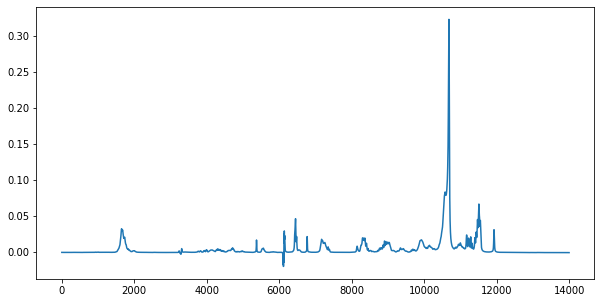

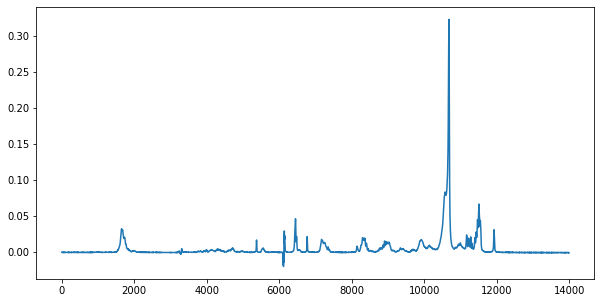

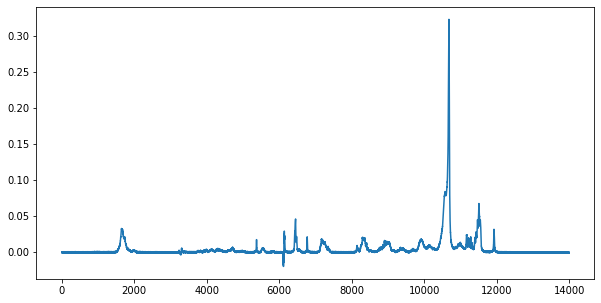

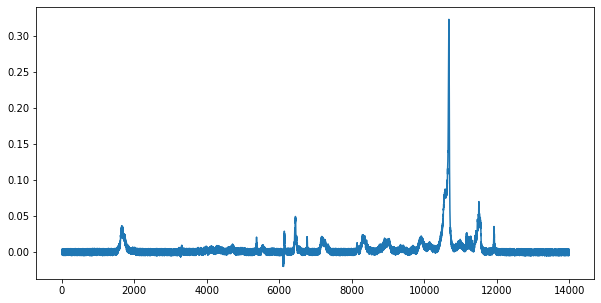

In [786]:
plt.plot(TestSpec[0])
plt.show()
plt.plot(TestSpec4[0])
plt.show()
plt.plot(TestSpec1[0])
plt.show()
plt.plot(TestSpec2[0])
plt.show()

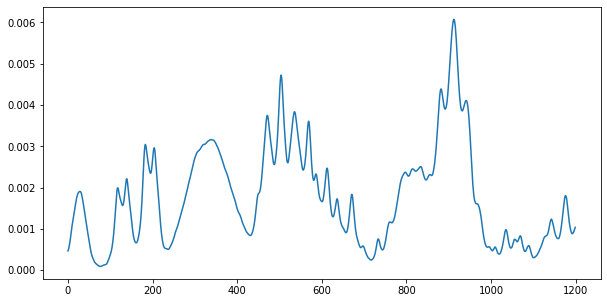

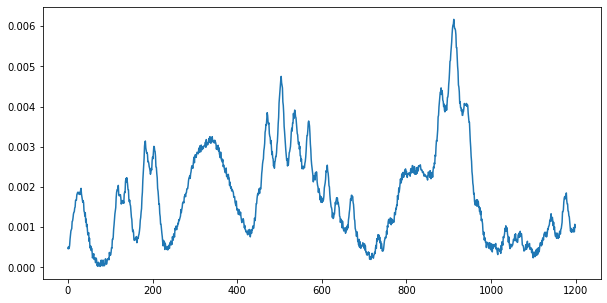

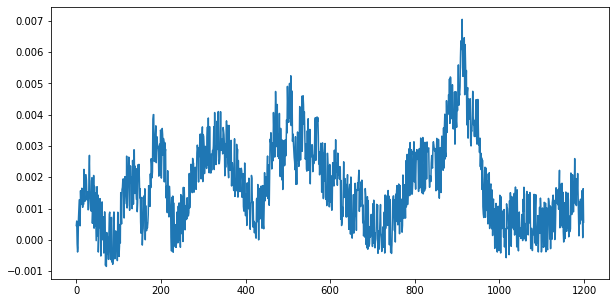

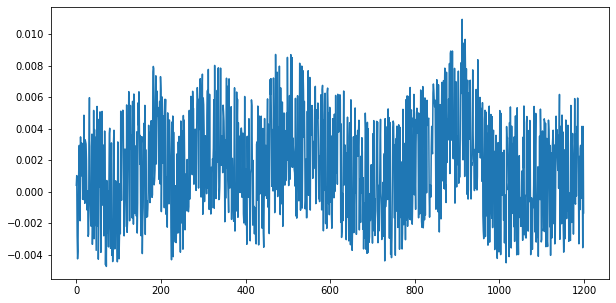

In [787]:
plt.plot(TestSpec[0][3800:5000])
plt.show()
plt.plot(TestSpec4[0][3800:5000])
plt.show()
plt.plot(TestSpec1[0][3800:5000])
plt.show()
plt.plot(TestSpec2[0][3800:5000])
plt.show()

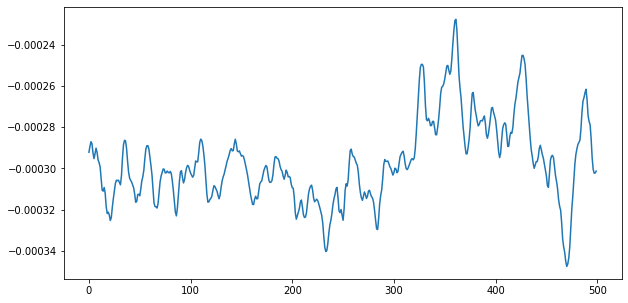

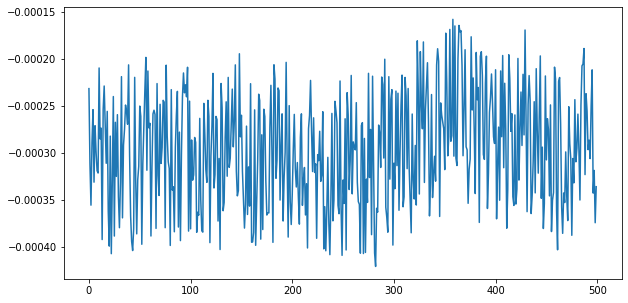

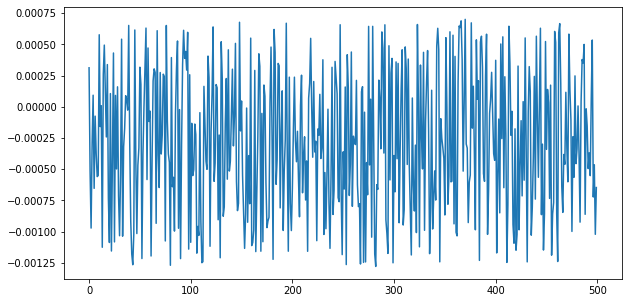

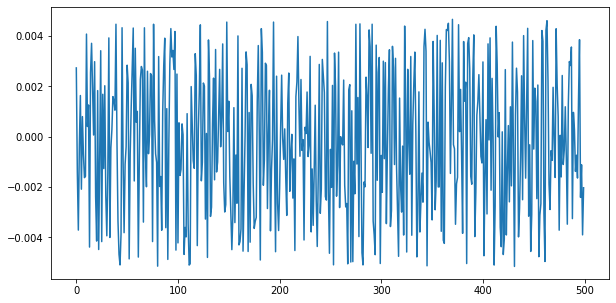

In [788]:
plt.plot(TestSpec[0][:500])
plt.show()
plt.plot(TestSpec4[0][:500])
plt.show()
plt.plot(TestSpec1[0][:500])
plt.show()
plt.plot(TestSpec2[0][:500])
plt.show()

## Test model RMSE for all 11 experimental mixtures in cases of increasing noise

In [724]:
## To me, the RMSE results seem to make more sense than the above results?

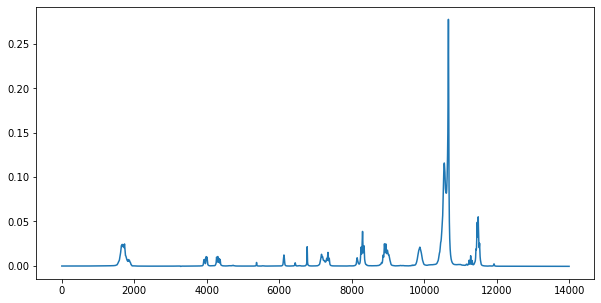

In [752]:
plt.plot(test[0])

In [753]:
ypred = model.predict((test))

    
rmse1 = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all1 = []

for i in np.arange(18):
    print(LipList5[i],rmse1[i].round(2))
    rmse_all1.append(rmse1[i])
    
print("Overall RMSE: ",np.array(rmse_all1).mean().round(3))

1/1 [==============================] - 0s 15ms/step
Tg 0.01
TC 0.02
TPL 0.01
TFA 0.01
PUFA 0.0
MUFA 0.01
SFA 0.01
Om3 0.01
Om6 0.0
Om9 0.01
LA 0.01
DHA 0.01
PC 0.05
PE 0.07
FC 0.03
EC 0.05
LPC 0.19
SM 0.06
Overall RMSE:  0.031


In [754]:
S_1 = []
for i in np.arange(11):
    S_1.append(test[i].mean())
S_1 = np.array(S_1).mean()

N_1 = []
for i in np.arange(11):
    N_1.append(np.std(test[0][:500]))
N_1 = np.array(N_1).mean()
#print(S)
#print(N)
SNR = S_1/N_1
print(S_1/N_1)

376.8731


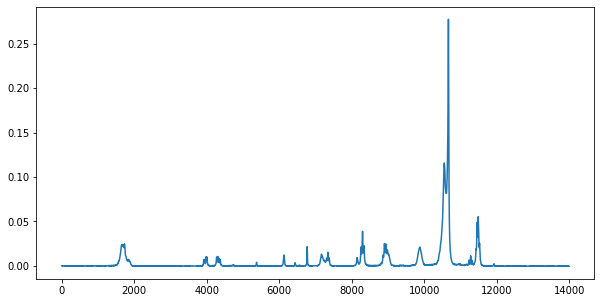

In [755]:
np.random.seed(454545)
noise4 = np.random.uniform(low=-0.0001,high=0.0001,size=14000)
test4 = []

for i in np.arange(11):
    test4.append(test[i]+noise4)
    
test4 = np.array(test4)
plt.plot(test4[0])

In [756]:
ypred = model.predict((test4))


rmse4 = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all4 = []

for i in np.arange(18):
    print(LipList5[i],rmse4[i].round(2))
    rmse_all4.append(rmse4[i])
    
print("Overall RMSE: ",np.array(rmse_all4).mean().round(3))

1/1 [==============================] - 0s 15ms/step
Tg 0.01
TC 0.02
TPL 0.01
TFA 0.01
PUFA 0.0
MUFA 0.01
SFA 0.01
Om3 0.01
Om6 0.0
Om9 0.01
LA 0.01
DHA 0.01
PC 0.05
PE 0.07
FC 0.03
EC 0.05
LPC 0.19
SM 0.06
Overall RMSE:  0.031


In [757]:
S_4 = []
for i in np.arange(11):
    S_4.append(test4[i].mean())
S_4 = np.array(S_4).mean()

N_4 = []
for i in np.arange(11):
    N_4.append(np.std(test4[0][:500]))
N_4 = np.array(N_4).mean()
#print(S)
#print(N)
SNR4 = S_4/N_4
print(S_4/N_4)

57.47406461469487


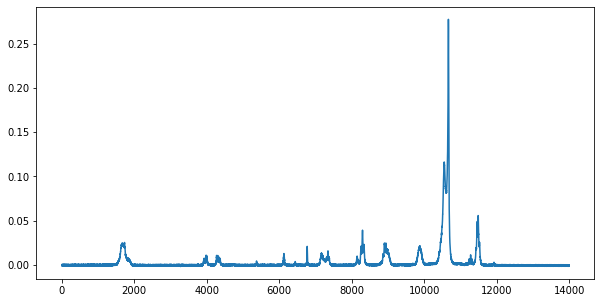

In [758]:
np.random.seed(454545)
noise1 = np.random.uniform(low=-0.001,high=0.001,size=14000)
test2 = []

for i in np.arange(11):
    test2.append(test[i]+noise1)
    
test2 = np.array(test2)
plt.plot(test2[0])

In [740]:
ypred = model.predict((test2))
    
    
rmse2 = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all2 = []

for i in np.arange(18):
    print(LipList5[i],rmse2[i].round(2))
    rmse_all2.append(rmse2[i])
    
print("Overall RMSE: ",np.array(rmse_all2).mean().round(3))

1/1 [==============================] - 0s 18ms/step
Tg 0.01
TC 0.02
TPL 0.01
TFA 0.01
PUFA 0.0
MUFA 0.01
SFA 0.01
Om3 0.01
Om6 0.01
Om9 0.01
LA 0.01
DHA 0.01
PC 0.06
PE 0.06
FC 0.03
EC 0.04
LPC 0.22
SM 0.07
Overall RMSE:  0.034


In [748]:
S_2 = []
for i in np.arange(11):
    S_2.append(test2[i].mean())
S_2 = np.array(S_2).mean()

N_2 = []
for i in np.arange(11):
    N_2.append(np.std(test2[0][:500]))
N_2 = np.array(N_2).mean()
#print(S)
#print(N)
SNR2 = S_2/N_2
print(S_2/N_2)

5.814025747178574


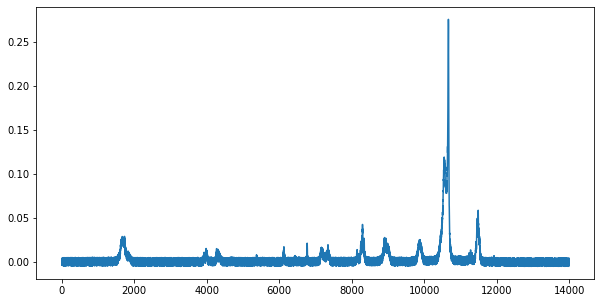

In [741]:
np.random.seed(454545)
noise2 = np.random.uniform(low=-0.005,high=0.005,size=14000)
test3 = []

for i in np.arange(11):
    test3.append(test[i]+noise2)
    
test3 = np.array(test3)
plt.plot(test3[0])

In [742]:
ypred = model.predict((test3))
    
    
rmse3 = np.sqrt(((ypred - TestLipProfiles_s) ** 2).mean(axis=0))
rmse_all3 = []

for i in np.arange(18):
    print(LipList5[i],rmse3[i].round(2))
    rmse_all3.append(rmse3[i])
    
print("Overall RMSE: ",np.array(rmse_all3).mean().round(3))

1/1 [==============================] - 0s 15ms/step
Tg 0.01
TC 0.02
TPL 0.02
TFA 0.01
PUFA 0.01
MUFA 0.01
SFA 0.01
Om3 0.01
Om6 0.01
Om9 0.01
LA 0.01
DHA 0.04
PC 0.11
PE 0.06
FC 0.04
EC 0.05
LPC 0.34
SM 0.13
Overall RMSE:  0.049


In [750]:
S_3 = []
for i in np.arange(11):
    S_3.append(test3[i].mean())
S_3 = np.array(S_3).mean()

N_3 = []
for i in np.arange(11):
    N_3.append(np.std(test3[0][:500]))
N_3 = np.array(N_3).mean()
#print(S)
#print(N)
SNR3 = S_3/N_3
print(S_3/N_3)

1.1640860909072603


In [789]:
print("Original Scan - SNR:",SNR.round(2),"RMSE:",np.array(rmse_all1).mean().round(3))
print("Add Noise - SNR:",SNR4.round(2),"RMSE:",np.array(rmse_all4).mean().round(3))
print("Add More Noise - SNR:",SNR2.round(2),"RMSE:",np.array(rmse_all2).mean().round(3))
print("Even More Noise - SNR:",SNR3.round(2),"RMSE:",np.array(rmse_all3).mean().round(3))
print("_____________________________________________________")
print("The above SNR determined by taking the mean of each spectra, then defining the signal as the mean of the means. The noise is the standard deviation of the first 500 data points. SNR by peak height and noise by peak-to-trough amplitude of noise would be slightly different.")

Original Scan - SNR: 221.51 RMSE: 0.031
Add Noise - SNR: 74.34 RMSE: 0.031
Add More Noise - SNR: 1.6 RMSE: 0.034
Even More Noise - SNR: 1.16 RMSE: 0.049
_____________________________________________________
The above SNR determined by taking the mean of each spectra, then defining the signal as the mean of the means. The noise is the standard deviation of the first 500 data points. SNR by peak height and noise by peak-to-trough amplitude of noise would be slightly different.


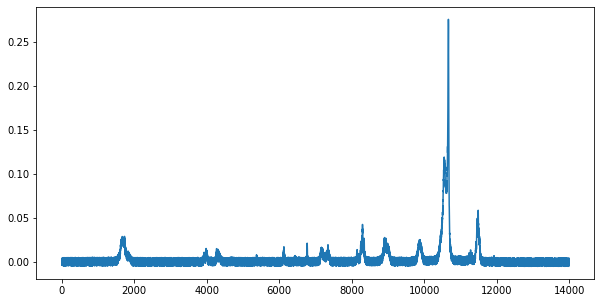

In [790]:
plt.plot(test3[0])